In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

In [2]:
report_data = pd.read_csv('report_data.csv', delimiter=';')

# General preprocessing

In [3]:
df = report_data.copy()
df = df.replace('Нет ответа', np.nan)

In [4]:
sns.set(rc={'figure.figsize':(12,12)})

def clean_unnecessary(df):
    for column in df.columns:
        categories = df[column].value_counts()
        categories = categories.where(lambda x: x < 20).dropna().index.unique()
        df[column] = df[column].astype('category').cat.remove_categories(categories)
    return df


def visualize(df):
    # visualize sex distirbution
    fig, ax = plt.subplots(3, 1)
    sns.countplot(x=df[df.columns[3]], ax=ax[0])

    # visualize age distribution
    sns.countplot(x=df[df.columns[4]], ax=ax[1])

    # visualize education distribution
    sns.countplot(x=df[df.columns[5]], ax=ax[2])
    fig.show()

C:\Users\mtank\AppData\Local\Temp\ipykernel_16032\4075823596.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype('category').cat.remove_categories(categories)
C:\Users\mtank\AppData\Local\Temp\ipykernel_16032\4075823596.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype('category').cat.remove_categories(categories)
C:\Users\mtank\AppData\Local\Temp\ipykernel_16032\4075823596.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of

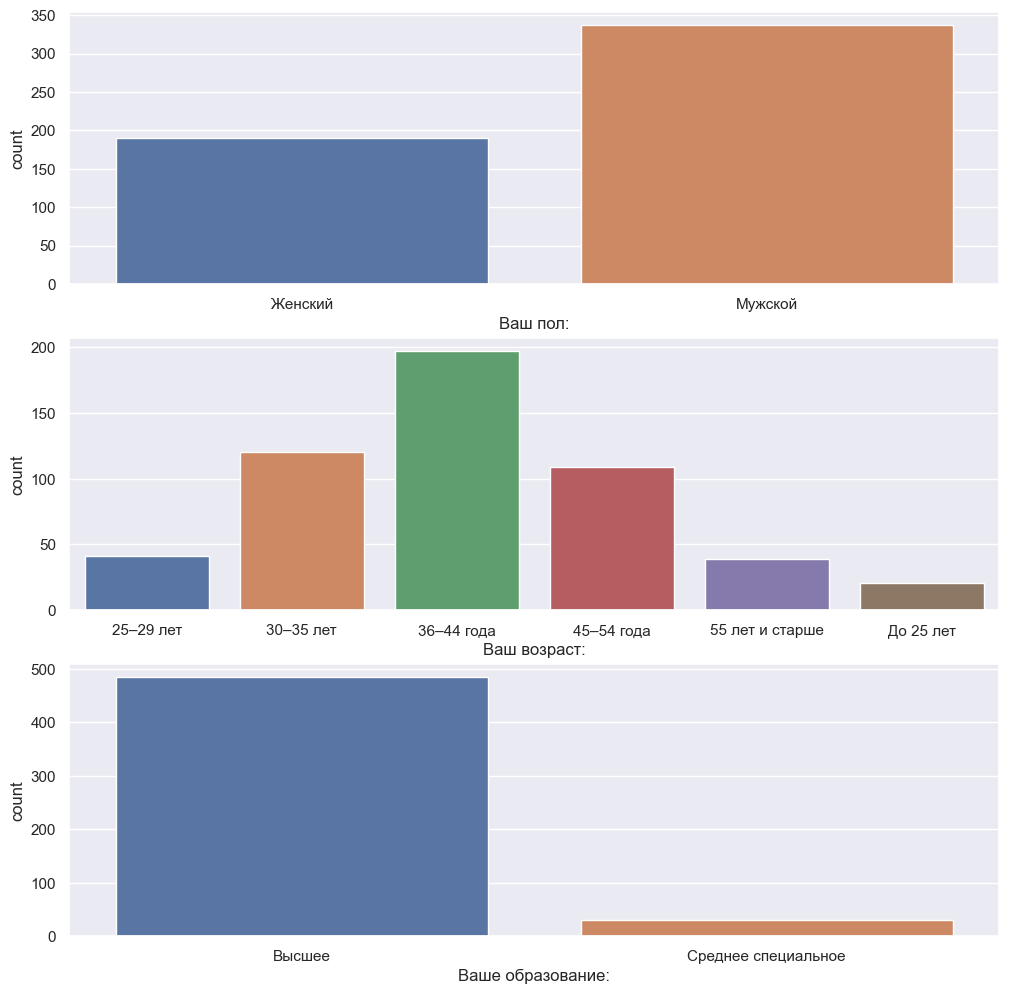

In [5]:
df_filt = df[df[df.columns[6]] == 'Электроэнергетический']
visualize(clean_unnecessary(df_filt))

# Preprocessing for HYPOTHESIS #1 (not done)

In [102]:
q1 = 'Какой формат обучения в РЕКОРД mobile вы скорее выберите, если есть задача получить профессиональные знания по своей или другой специальности?'
q2 = 'Какой формат обучения в РЕКОРД mobile вы скорее выберите, если есть задача повысить личную эффективность и получить знания по общим бизнес-навыкам? \nК бизнес-навыкам относятся коммуникации, планирование, переговоры, навыки публичных выступлений.'
q3 = 'Какой формат обучения в РЕКОРД mobile вы скорее выберите, если есть задача получить знания в области управленческих компетенций?'
q4 = 'Какой формат обучения в РЕКОРД mobile вы скорее выберите, если есть задача получить знания в области цифровых и информационных технологий?'


In [183]:
hypothesis_columns_1 = []
hypothesis_columns_1.extend([q1, q2, q3, q4])
df_1 = df.copy()[hypothesis_columns_1]

df_1 = df_1.dropna()
#df_1 = clean_unnecessary(df_1.drop(df_1.columns[-1], axis=1))
#df_1 = df_1.dropna()

In [184]:
for column in df_1.columns:
    df_1[column] = df_1[column].apply(lambda x: x.replace('(интерактивный формат, содержащий текст, видео/аудио, иллюстрации, упражнения/игровые механики)', ''))
df_1

Какой формат обучения в РЕКОРД mobile вы скорее выберите, если есть задача получить профессиональные знания по своей или другой специальности?  \
0                                                Тексты                                                                                               
1                                     Электронный курс                                                                                                
2     Электронный курс , Запись вебинара, Запись инт...                                                                                               
3                                     Электронный курс                                                                                                
4     Электронный курс , Формат не имеет значения, Т...                                                                                               
...                                                 ...                                                                                               
2763                                  Электронный курс                                                                                                
2764                 Электронный курс , Запись вебинара                                                                                               
2766       Электронный курс , Запись экрана (скринкаст)                                                                                               
2767  Запись экрана (скринкаст), Тексты, Электронный...                                                                                               
2769   Запись спикера в студии, Тексты, Запись интервью                                                                                               

     Какой формат обучения в РЕКОРД mobile вы скорее выберите, если есть задача повысить личную эффективность и получить знания по общим бизнес-навыкам? \nК бизнес-навыкам относятся коммуникации, планирование, переговоры, навыки публичных выступлений.  \
0                                       Запись интервью                                                                                                                                                                                                       
1                                     Электронный курс                                                                                                                                                                                                        
2     Электронный курс , Запись вебинара, Запись инт...                                                                                                                                                                                                       
3                     Передо мной такая задача не стоит                                                                                                                                                                                                       
4           Электронный курс , Формат не имеет значения                                                                                                                                                                                                       
...                                                 ...                                                                                                                                                                                                       
2763                                  Электронный курс                                                                                                                                                                                                        
2764                 Электронный курс , Запись вебинара                                                                                                 

In [185]:
columns=['Электронный курс', 'Запись вебинара', 'Передо мной такая задача не стоит', 'Тексты', 'Запись спикера в студии', 'Запись интервью', 'Аудио-подкасты', 'Формат не имеет значение', 'Другое']

def split_columns(column):
    split_columns = pd.DataFrame(range(0), columns=columns)
    for row in df_1[df_1.columns[column]]:
        l = []
        for item in columns:
            if item in row:
                l.append(int(1))
            else:
                l.append(int(0))
        split_columns.loc[len(split_columns.index)] = l
    return split_columns

In [197]:
sc_professional = split_columns(0).apply(lambda x: x.apply(lambda x: int(x)))
sc_obschiy = split_columns(1).apply(lambda x: x.apply(lambda x: int(x)))
sc_management = split_columns(2).apply(lambda x: x.apply(lambda x: int(x)))
sc_it = split_columns(3).apply(lambda x: x.apply(lambda x: int(x)))

<AxesSubplot:>

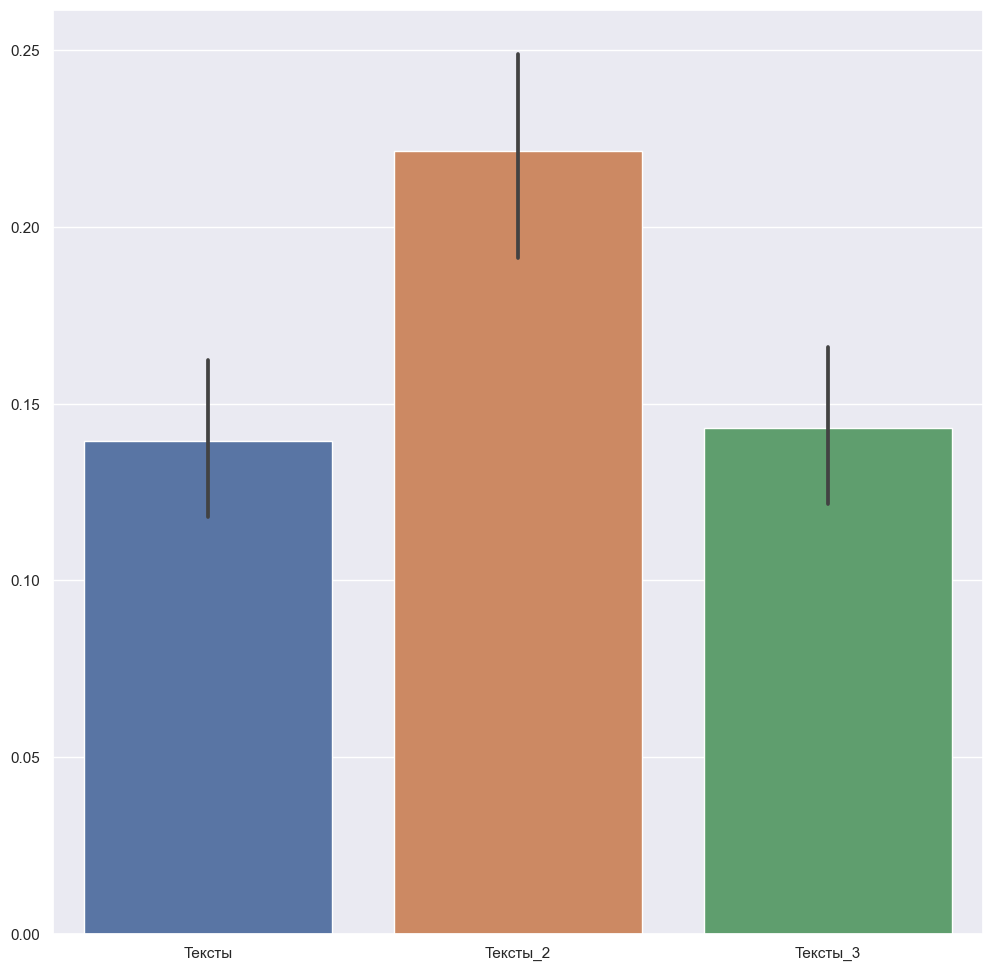

In [174]:
split_columns = split_columns.apply(lambda x: x.apply(lambda x: int(x)))
sns.barplot(data = split_columns[['Тексты', 'Тексты_2', 'Тексты_3']])

# Preprocessing for HYPOTHESIS #2

In [56]:
# 2nd hypothesis
q1 = 'Сколько времени на обучение в среднем в неделю вы готовы выделять?'
q2 = 'Когда чаще всего вы проходите обучение, назначенное HR/в системе РЕКОРД?'
q3 = 'Представьте, что у вас есть возможность всегда выбирать, в каком формате проходить обучение в РЕКОРД mobile.'

hypothesis_columns_2 = [df.columns[x] for x in [3, 4, 5, 6, 8, 9]]
hypothesis_columns_2.extend([q1,q2,q3])
df_2 = df.copy()[hypothesis_columns_2]

df_2 = df_2.copy().dropna()
buffer_column = df_2[df_2.columns[-1]]
df_2 = clean_unnecessary(df_2.drop(df_2.columns[-1], axis=1))
df_2[buffer_column.name] = buffer_column
df_2 = df_2.dropna()

In [57]:
# OneHotEncode (dummify) all categorical features and Y columns

df_2_dummified = pd.get_dummies(df_2, columns=df_2.columns[:-1])
ans3 = df_2_dummified[df_2_dummified.columns[0]]
df_2_dummified = df_2_dummified.drop(df_2_dummified.columns[0], axis=1)

In [60]:
last_column = pd.DataFrame(ans3)
last_column = last_column[last_column.columns[0]].apply(lambda x: x.split(';'))
last_column = last_column.to_list()
dataframe = pd.DataFrame(range(0), columns=['В каком формате проходить обучение_Электронный курс', 'В каком формате проходить обучение_Запись вебинара', 
'В каком формате проходить обучение_Запись экрана', 'В каком формате проходить обучение_Запись интервью', 'В каком формате проходить обучение_Запись спикера в студии', 
'В каком формате проходить обучение_Аудио-подкаст', 'В каком формате проходить обучение_Тексты'])

In [61]:
for count, value in enumerate(last_column):
    x0 = list(filter(lambda x: 'Электронный курс' in x ,value))[0].replace(' ', '')[0]
    x1 = list(filter(lambda x: 'вебинара' in x ,value))[0].replace(' ', '')[0]
    x2 = list(filter(lambda x: 'экрана' in x ,value))[0].replace(' ', '')[0]
    x3 = list(filter(lambda x: 'интервью' in x ,value))[0].replace(' ', '')[0]
    x4 = list(filter(lambda x: 'спикера' in x ,value))[0].replace(' ', '')[0]
    x5 = list(filter(lambda x: 'Аудио-подкаст' in x ,value))[0].replace(' ', '')[0]
    x6 = list(filter(lambda x: 'Тексты' in x ,value))[0].replace(' ', '')[0]
    placement = {'Электронный курс': x0,
    'Запись вебинара': x1, 
    'Запись экрана': x2, 
    'Запись интервью': x3, 
    'Запись спикера в студии': x4, 
    'Аудио-подкаст': x5, 
    'Тексты': x6}
    dataframe.loc[len(dataframe.index)] = [x0,x1,x2,x3,x4,x5,x6]

In [62]:
# Define features

X = df_2_dummified[df_2_dummified.columns[:-10]]

In [72]:
# Define list of Y columns

Y = df_2_dummified[df_2_dummified.columns[-10:]]
Y = Y.reset_index().join(dataframe).drop('index', axis=1)
Y.columns

Index(['Сколько времени на обучение в среднем в неделю вы готовы выделять?_Более 2-х часов',
       'Сколько времени на обучение в среднем в неделю вы готовы выделять?_До 30 минут',
       'Сколько времени на обучение в среднем в неделю вы готовы выделять?_Нет возможности выделять время каждую неделю',
       'Сколько времени на обучение в среднем в неделю вы готовы выделять?_От 1 часа до 2-х часов',
       'Сколько времени на обучение в среднем в неделю вы готовы выделять?_От 30 минут до 1 часа',
       'Когда чаще всего вы проходите обучение, назначенное HR/в системе РЕКОРД?_В обеденный перерыв',
       'Когда чаще всего вы проходите обучение, назначенное HR/в системе РЕКОРД?_В рабочее время',
       'Когда чаще всего вы проходите обучение, назначенное HR/в системе РЕКОРД?_Мне не назначают обучение',
       'Когда чаще всего вы проходите обучение, назначенное HR/в системе РЕКОРД?_По вечерам/на выходных/в отпуске',
       'Когда чаще всего вы проходите обучение, назначенное HR/в систе

In [247]:
X

Ваш пол:_Женский  Ваш пол:_Мужской  Ваш возраст:_25–29 лет  \
1                    0                 1                       0   
2                    0                 1                       0   
3                    1                 0                       0   
4                    0                 1                       0   
5                    0                 1                       1   
...                ...               ...                     ...   
2762                 0                 1                       0   
2763                 1                 0                       0   
2764                 0                 1                       0   
2766                 1                 0                       0   
2767                 0                 1                       0   

      Ваш возраст:_30–35 лет  Ваш возраст:_36–44 года  \
1                          0                        1   
2                          1                        0   
3                          0                        0   
4                          0                        0   
5                          0                        0   
...                      ...                      ...   
2762                       1                        0   
2763                       0                        1   
2764                       0                        0   
2766                       0                        1   
2767                       0                        1   

      Ваш возраст:_45–54 года  Ваш возраст:_55 лет и старше  \
1                           0                             0   
2                           0                             0   
3                           1                             0   
4                           1                             0   
5                           0                             0   
...                       ...                           ...   
2762                        0                             0   
2763                        0                             0   
2764                        1                             0   
2766                        0                             0   
2767                        0                             0   

      Ваш возраст:_До 25 лет  Ваше образование:_Высшее  \
1                          0                         1   
2                          0                         1   
3                          0                         1   
4                          0                         1   
5                          0                         1   
...                      ...                       ...   
2762                       0                         1   
2763                       0                         0   
2764                       0                         1   
2766                       0                         0   
2767                       0                         1   

      Ваше образование:_Неоконченное высшее  ...  \
1                                         0  ...   
2                                         0  ...   
3                                         0  ...   
4                                         0  ...   
5                                         0  ...   
...                                     ...  ...   
2762                                      0  ...   
2763                                      0  ...   
2764                                      0  ...   
2766                                      0  ...   
2767                                      0  ...   

      Выберите ваш дивизион:_Экологические решения  \
1                                                1   
2                                                0   
3                                                0   
4                                                0   
5                                                0   
...                                            ...   
2762                                           

# Define function to calculate feature importance

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import shap


def get_feature_importances_from_column(X, Y, column, plot_shap):
    y = Y[Y.columns[column]]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.15, random_state=42)
    model = XGBRegressor(max_depth=5, alpha=50, n_estimators=1000)
    parameters = {'learning_rate': [.03, .05, .07],
                  'max_depth': [4, 5, 6, 7]}
    #xgb_grid = GridSearchCV(model, parameters, cv = 2, verbose=True)
    model = model.fit(X_train, y_train)
    #model = xgb_grid.best_estimator_
    feature_importances = model.feature_importances_
    prediction = model.predict(X_test)
    score = r2_score(y_test, prediction)
    if plot_shap == True:
        fig, ax = plt.subplots()
        explainer = shap.Explainer(model)
        shap_values = explainer(X_train)
        shap.summary_plot(shap_values, X_train)
        plt.show()
    else:
        sns.barplot(x=feature_importances, y=X.columns)
        plt.title(y.name)
        plt.show()
    return feature_importances, score


# Calculate and visualize feature importances for HYPHOTHESIS #1

In [237]:
test = pd.DataFrame([sc_professional.sum(),sc_obschiy.sum(),sc_management.sum(), sc_it.sum()], index=['Профессиональные', 'Общие', 'Управлене', 'IT'])
test

Электронный курс  Запись вебинара  \
Профессиональные              1634              810   
Общие                         1449              832   
Управлене                     1399              800   
IT                            1556              718   

                  Передо мной такая задача не стоит  Тексты  \
Профессиональные                                 78     561   
Общие                                           113     370   
Управлене                                       146     366   
IT                                              103     498   

                  Запись спикера в студии  Запись интервью  Аудио-подкасты  \
Профессиональные                      460              165               0   
Общие                                 656              325               0   
Управлене                             660              318               0   
IT                                    373              119               0   

                  Формат не имеет значение  Другое  
Профессиональные                         0       0  
Общие                                    0       0  
Управлене                                0       0  
IT                                       0       0

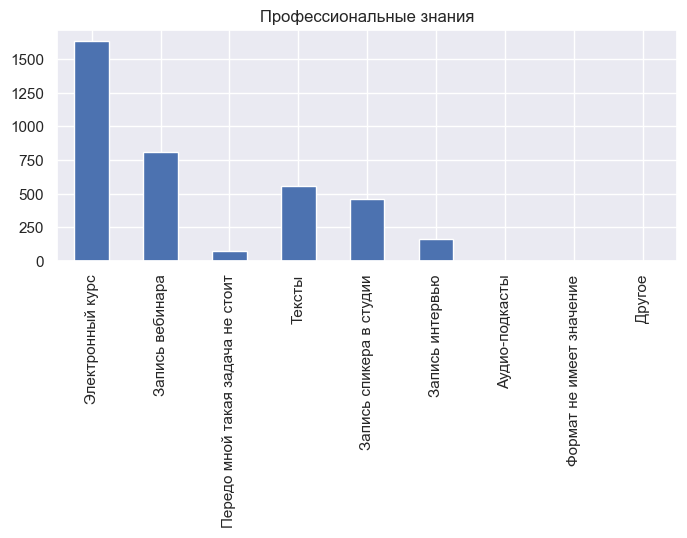

In [234]:
ax = sc_professional.sum().plot.bar(title='Профессиональные знания', figsize=(8,3))

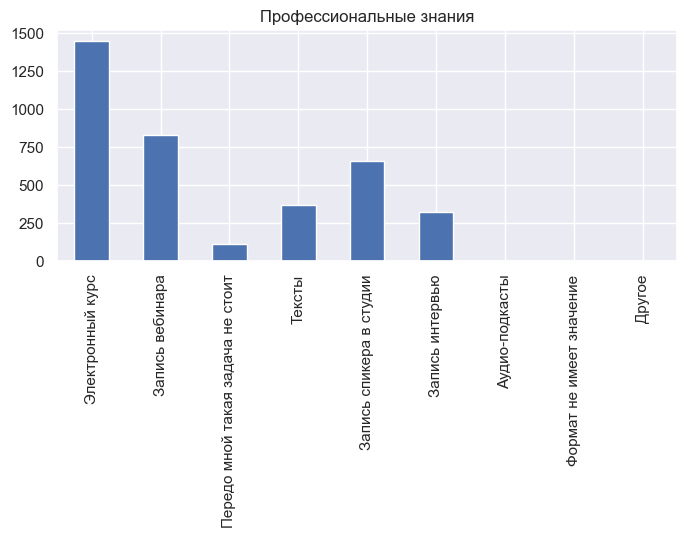

In [239]:
ax = sc_obschiy.sum().plot.bar(title='Профессиональные знания', figsize=(8,3))

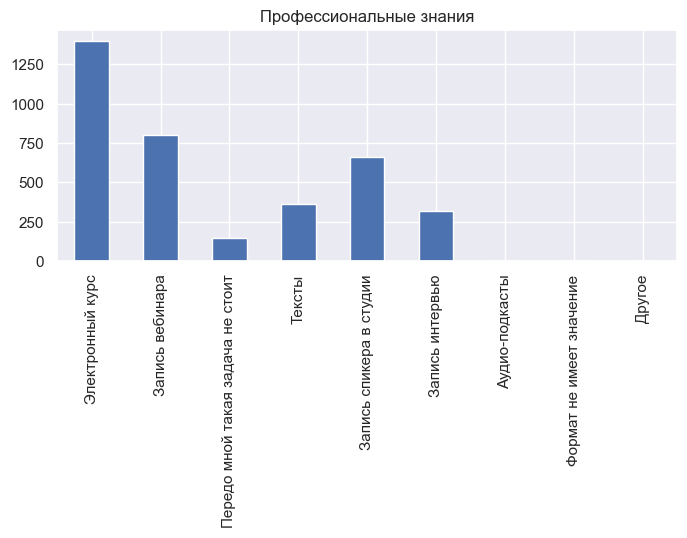

In [240]:
ax = sc_management.sum().plot.bar(title='Профессиональные знания', figsize=(8,3))

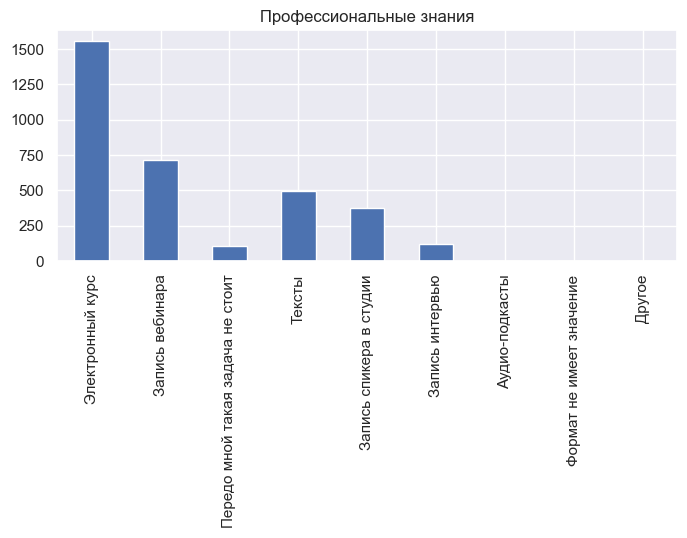

In [241]:
ax = sc_it.sum().plot.bar(title='Профессиональные знания', figsize=(8,3))

# Calculate and visualize feature importances for HYPHOTHESIS #2

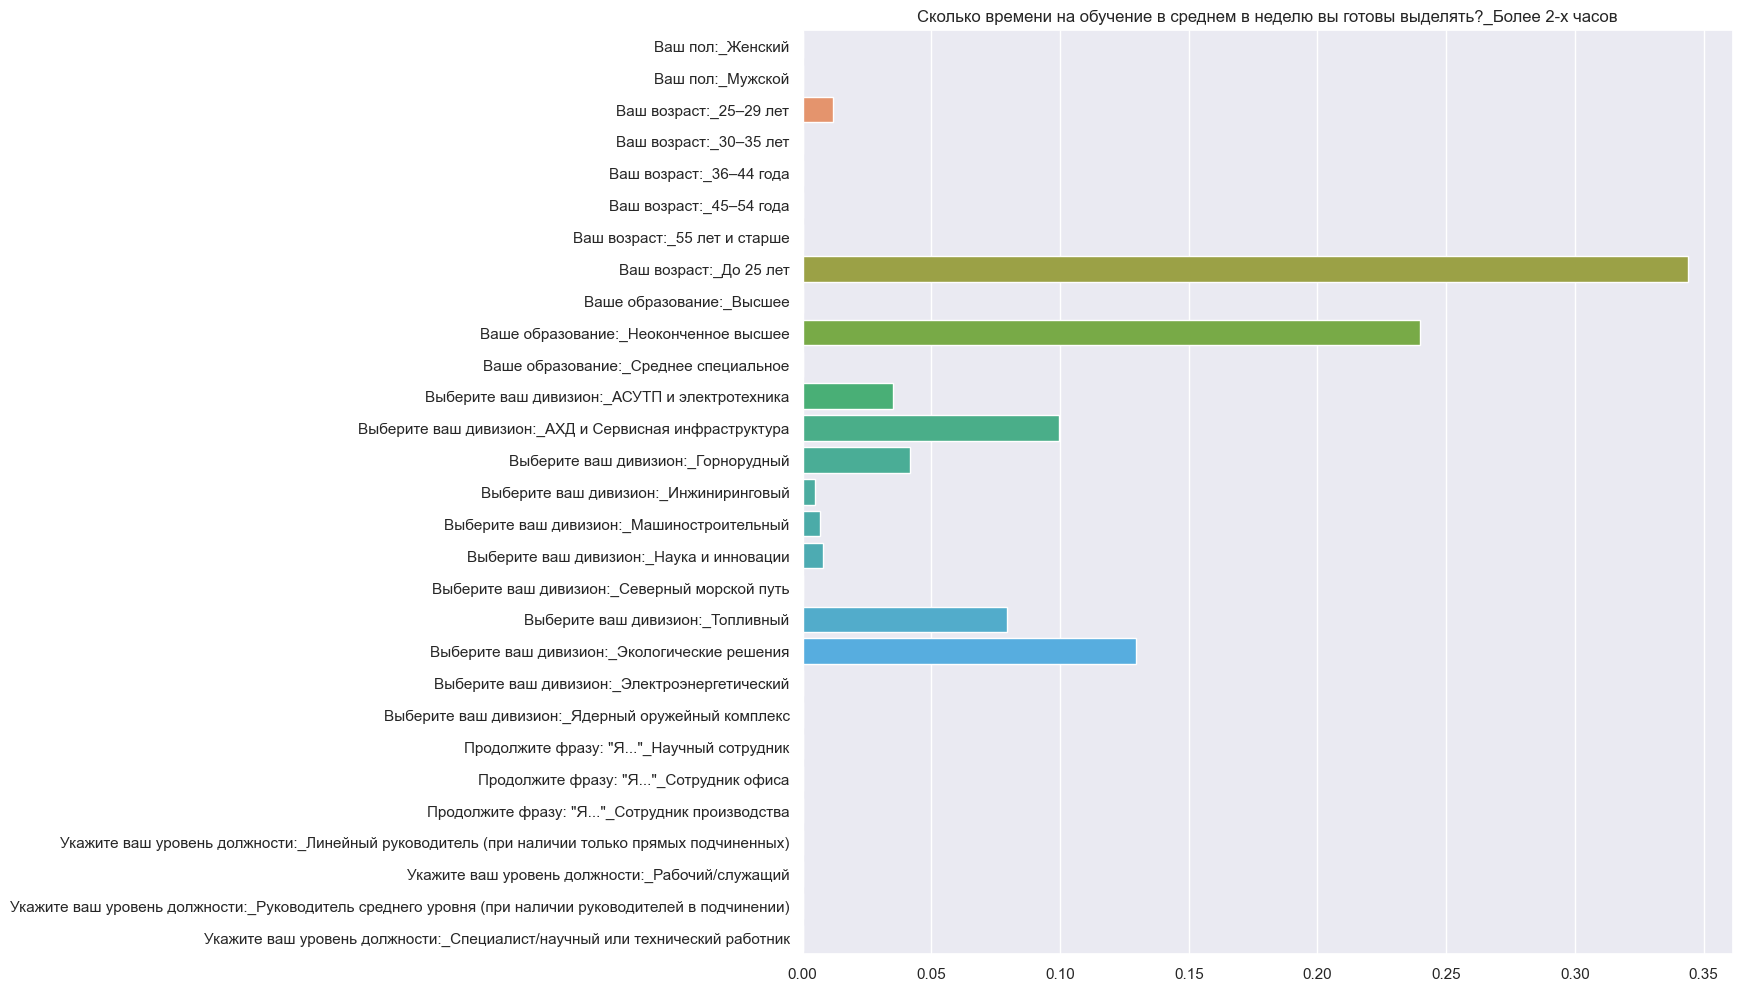

Question: Сколько времени на обучение в среднем в неделю вы готовы выделять?_Более 2-х часов
Model R^2 score: -0.01


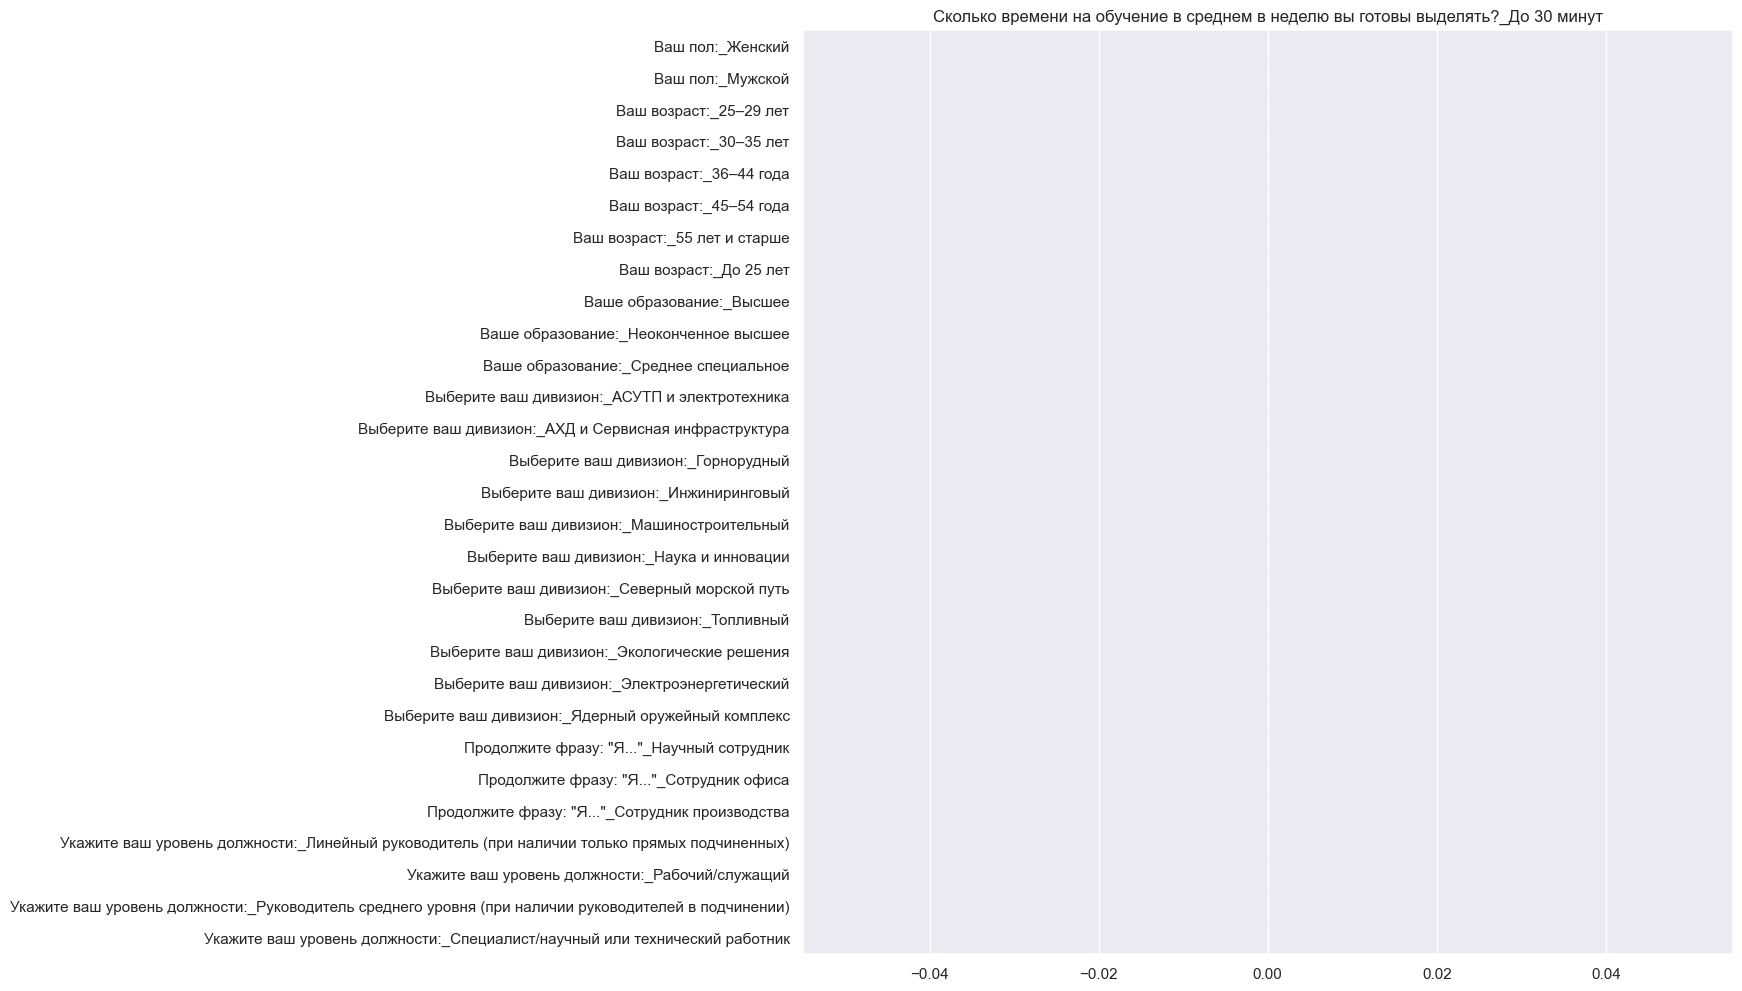

Question: Сколько времени на обучение в среднем в неделю вы готовы выделять?_До 30 минут
Model R^2 score: -0.01


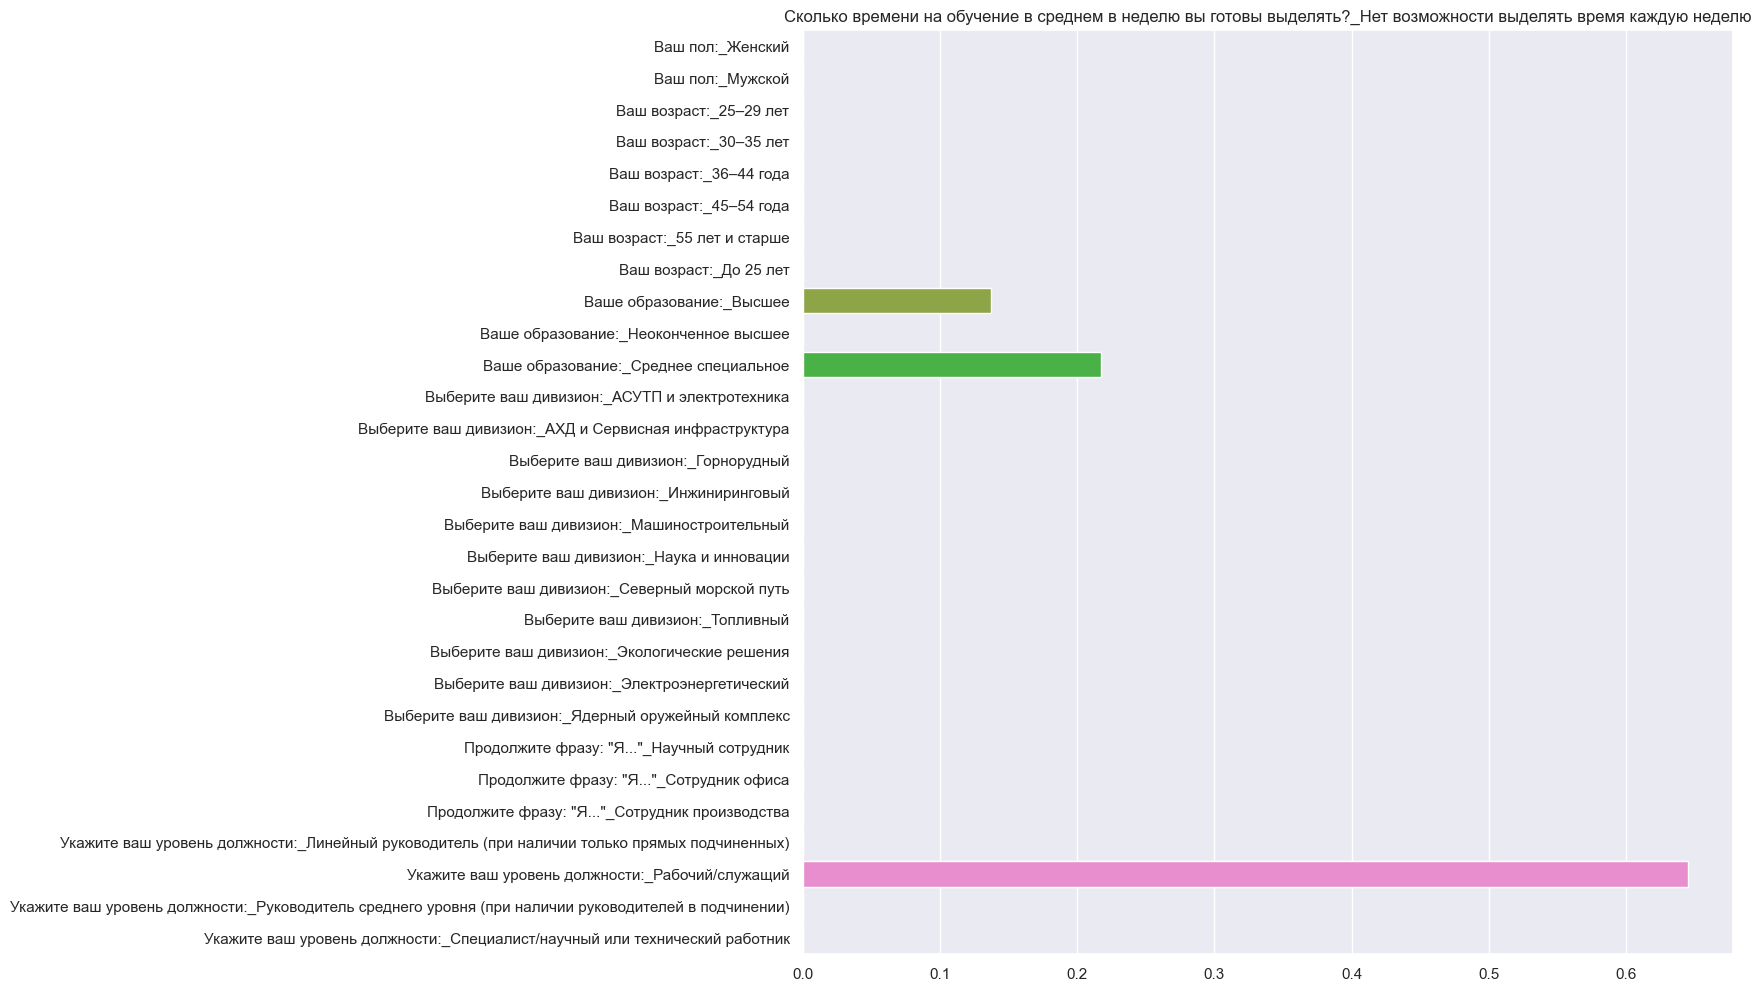

Question: Сколько времени на обучение в среднем в неделю вы готовы выделять?_Нет возможности выделять время каждую неделю
Model R^2 score: -0.01


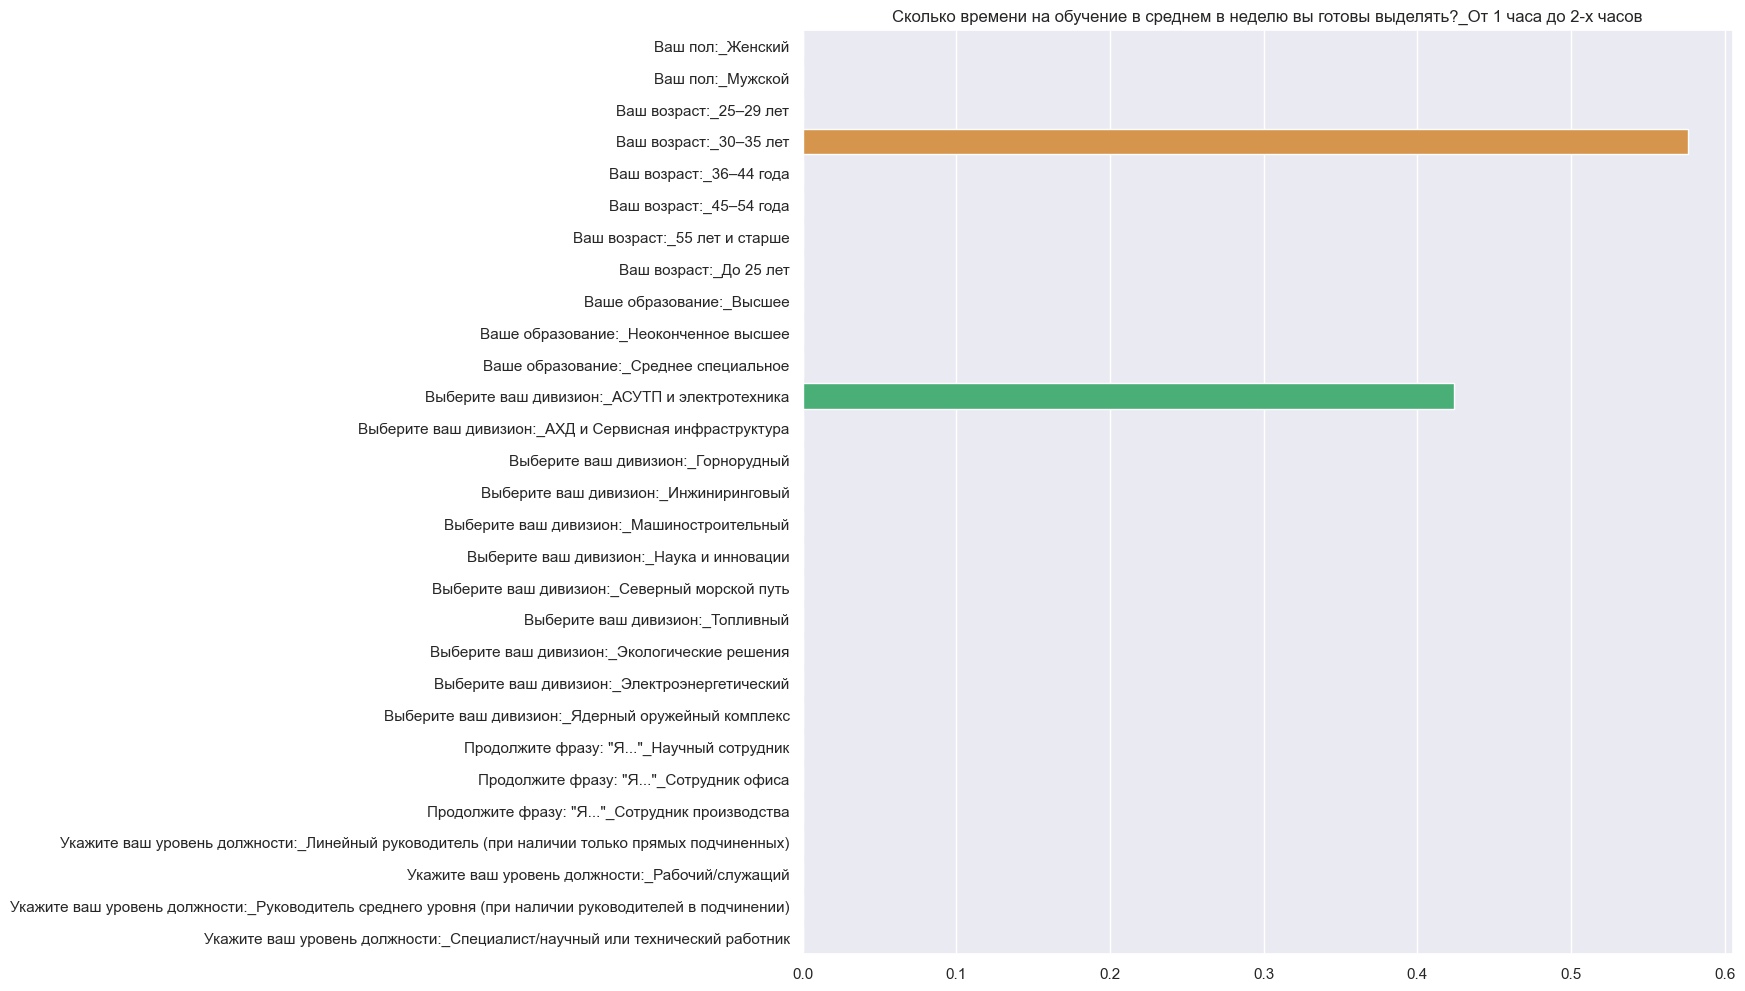

Question: Сколько времени на обучение в среднем в неделю вы готовы выделять?_От 1 часа до 2-х часов
Model R^2 score: 0.00


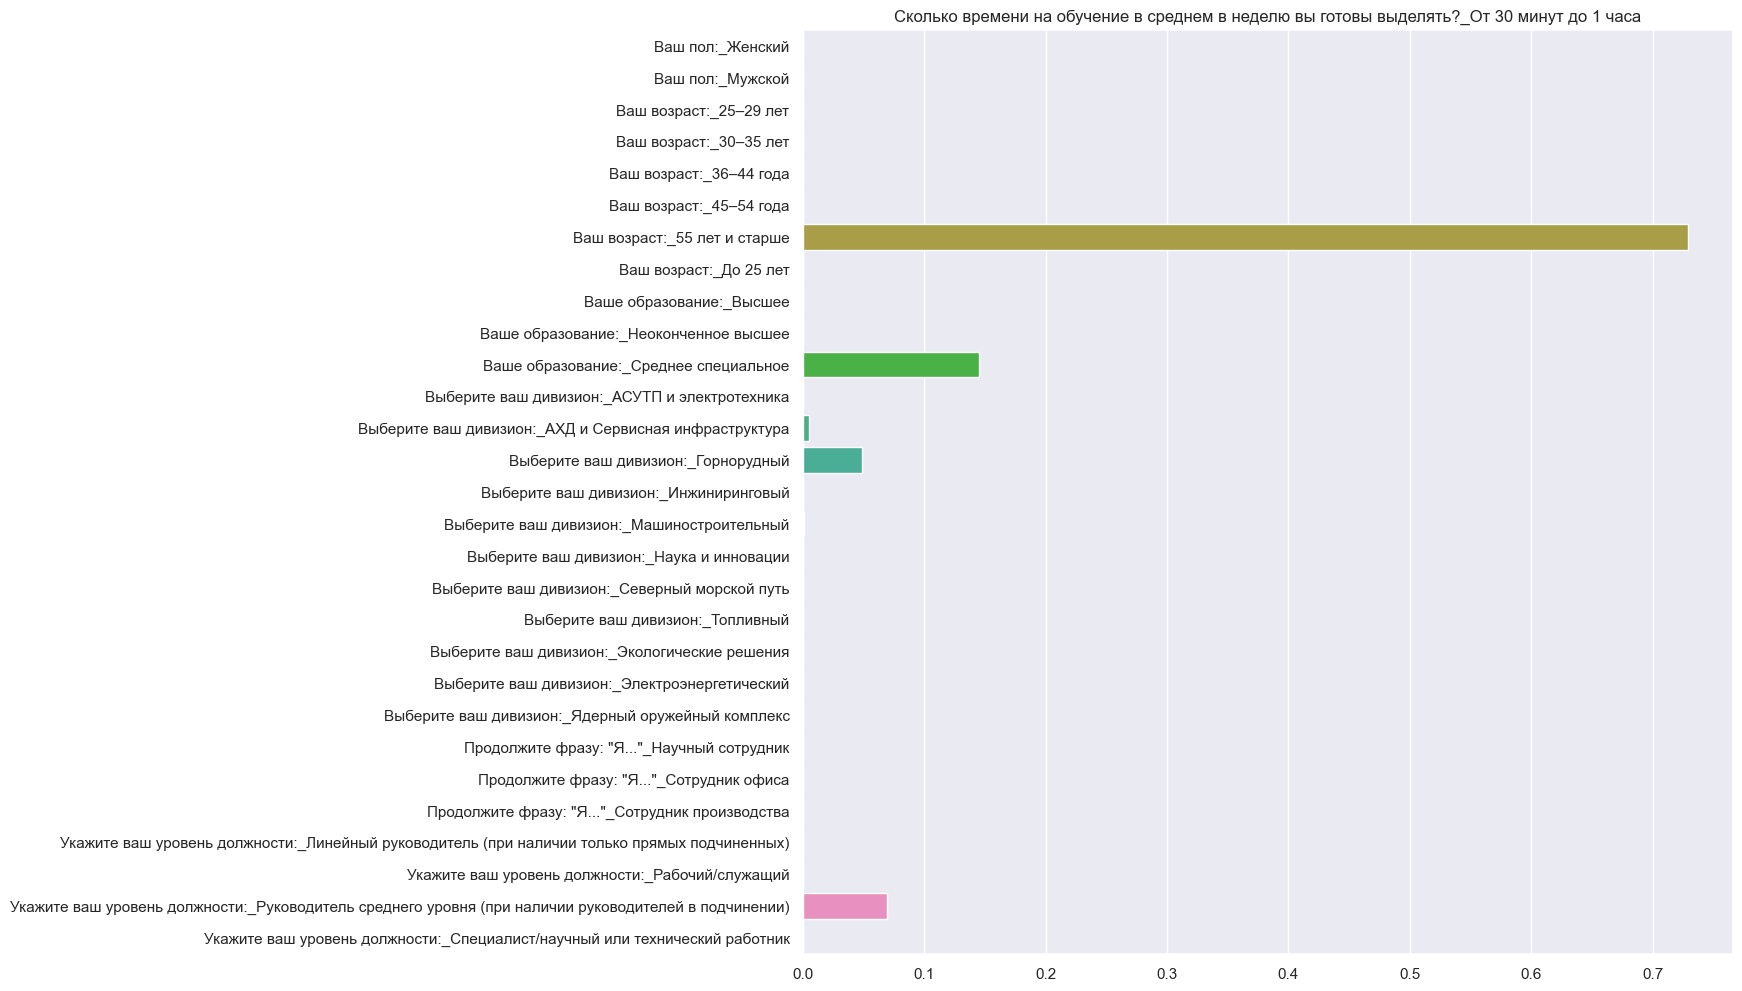

Question: Сколько времени на обучение в среднем в неделю вы готовы выделять?_От 30 минут до 1 часа
Model R^2 score: -0.02


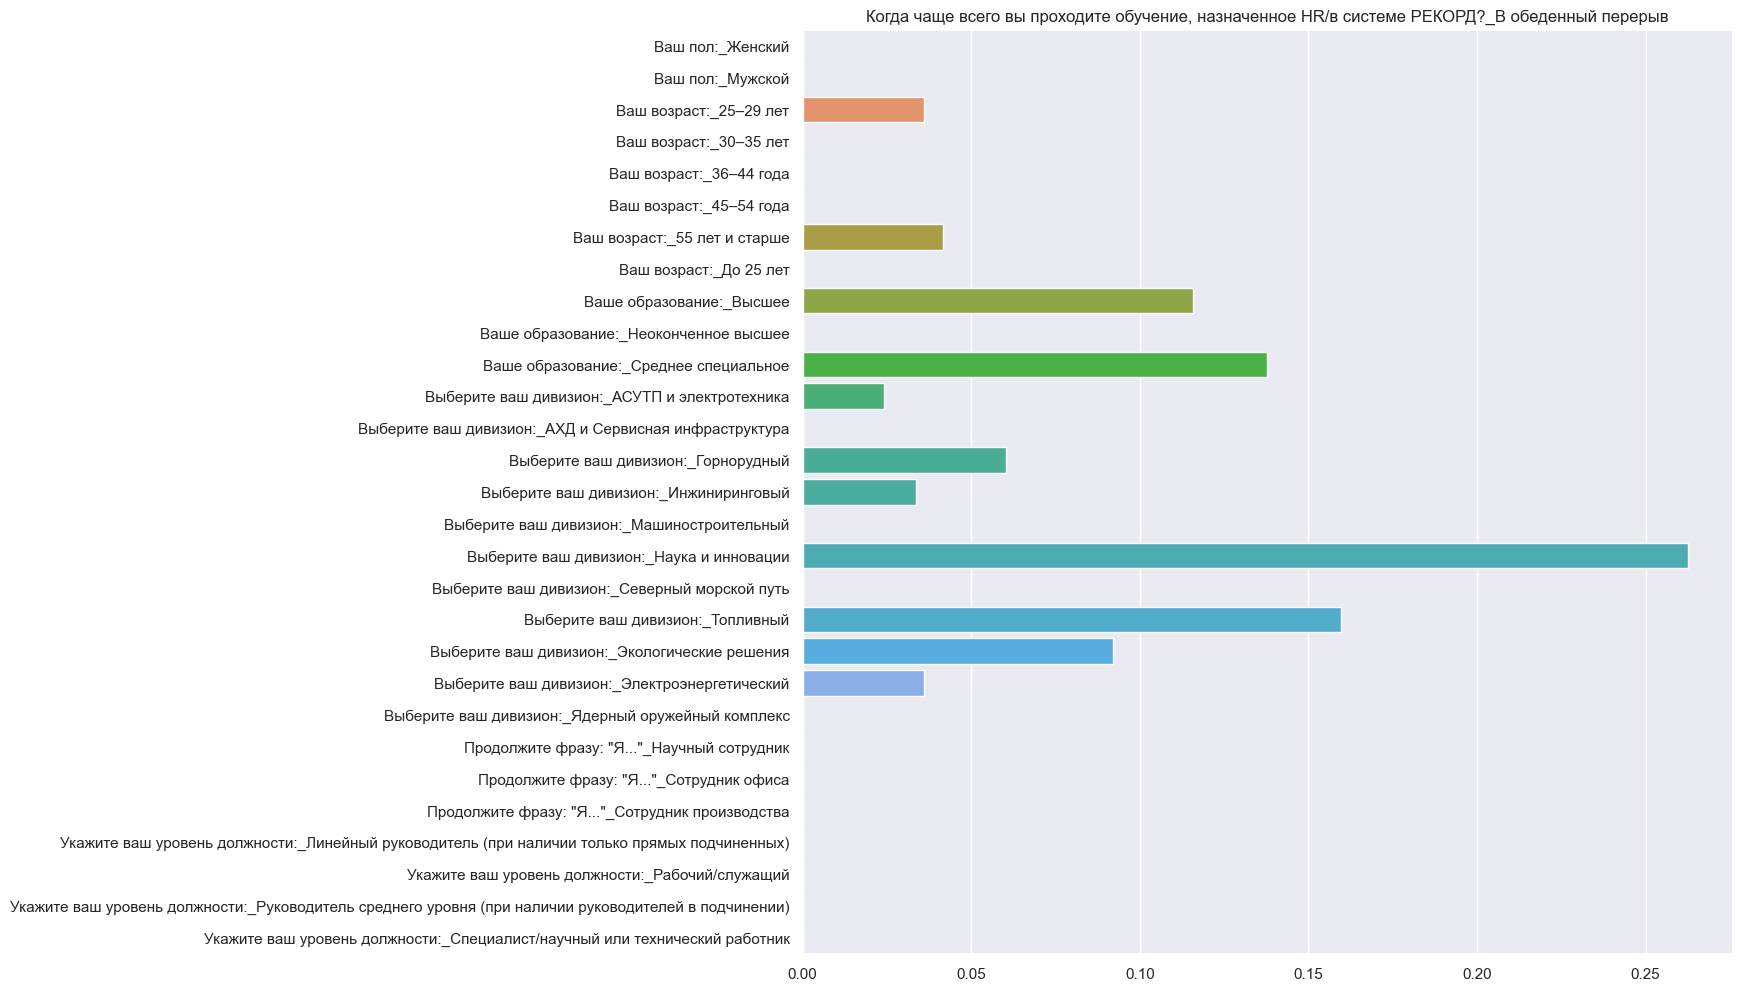

Question: Когда чаще всего вы проходите обучение, назначенное HR/в системе РЕКОРД?_В обеденный перерыв
Model R^2 score: -0.02


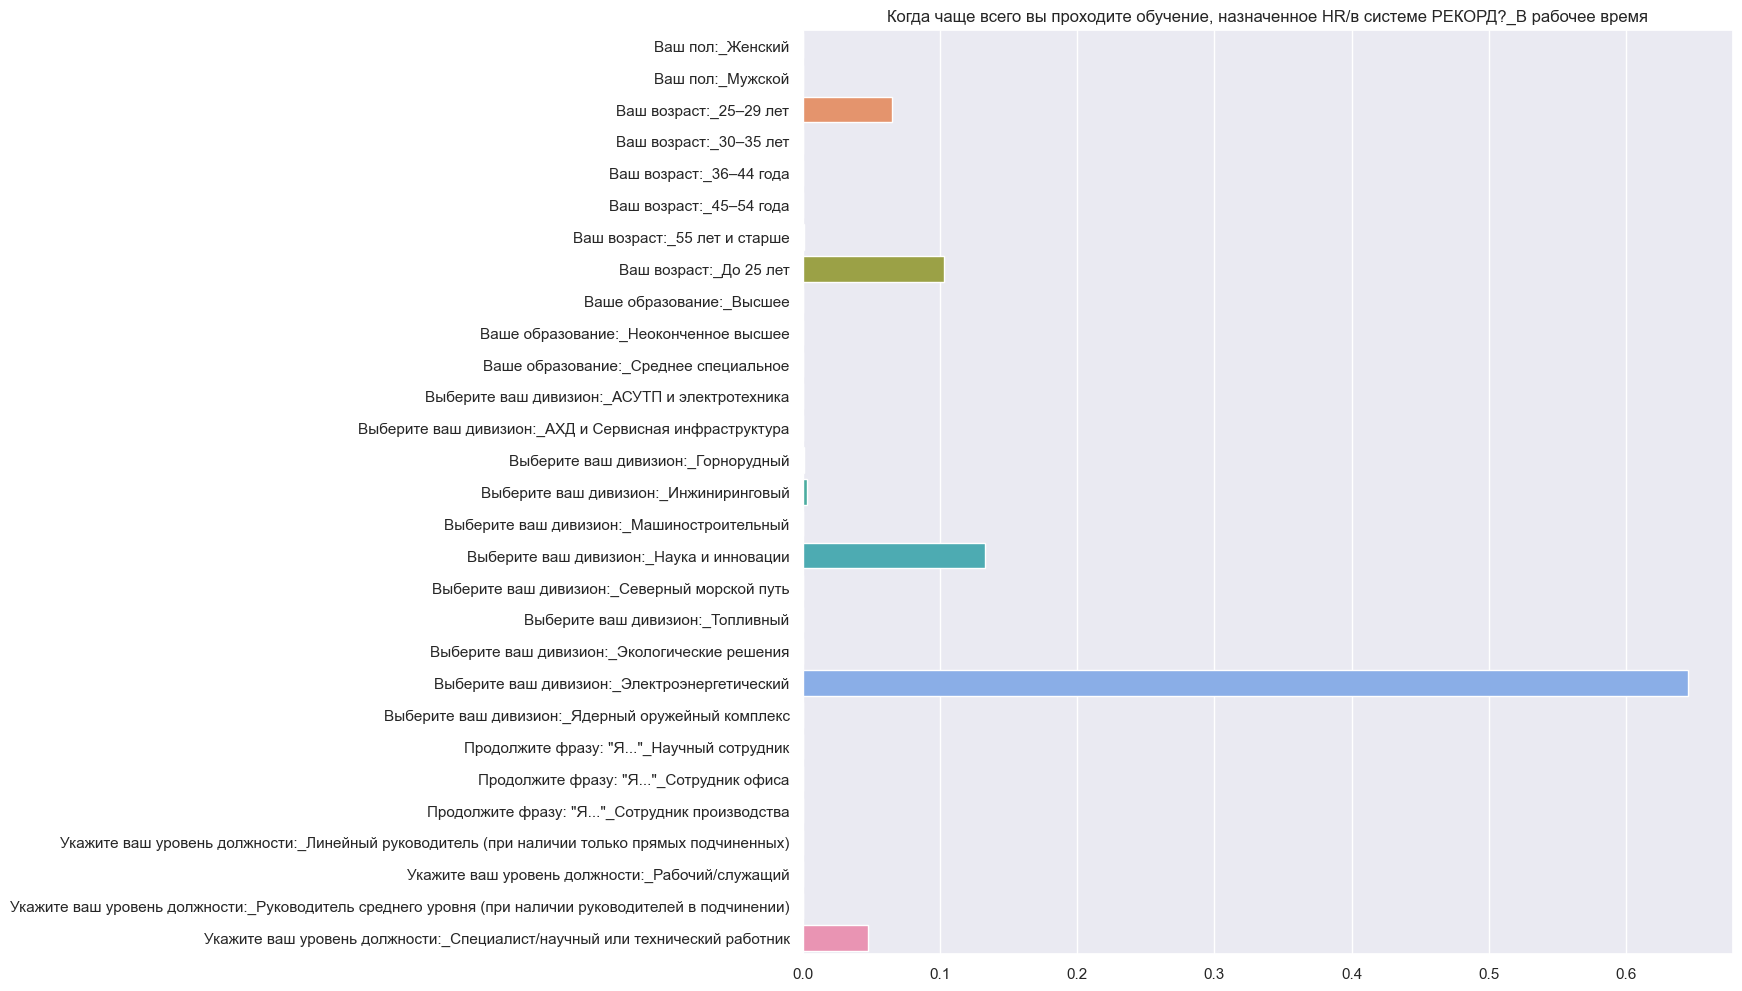

Question: Когда чаще всего вы проходите обучение, назначенное HR/в системе РЕКОРД?_В рабочее время
Model R^2 score: 0.02


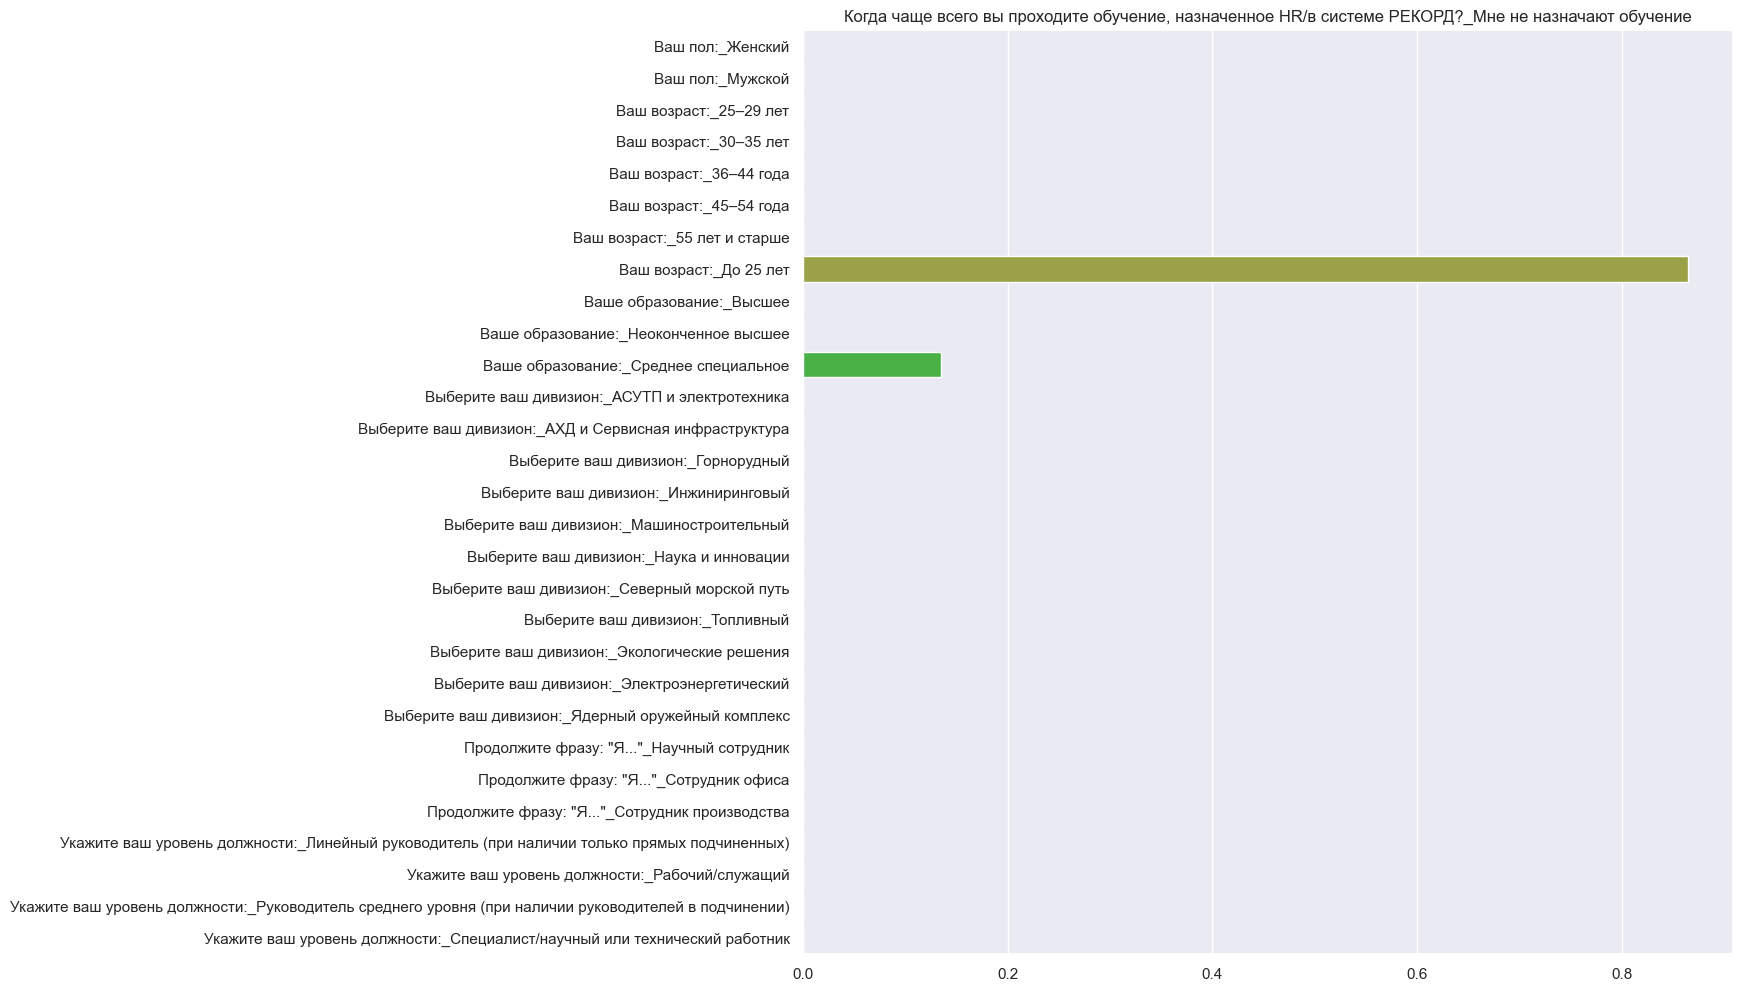

Question: Когда чаще всего вы проходите обучение, назначенное HR/в системе РЕКОРД?_Мне не назначают обучение
Model R^2 score: -0.06


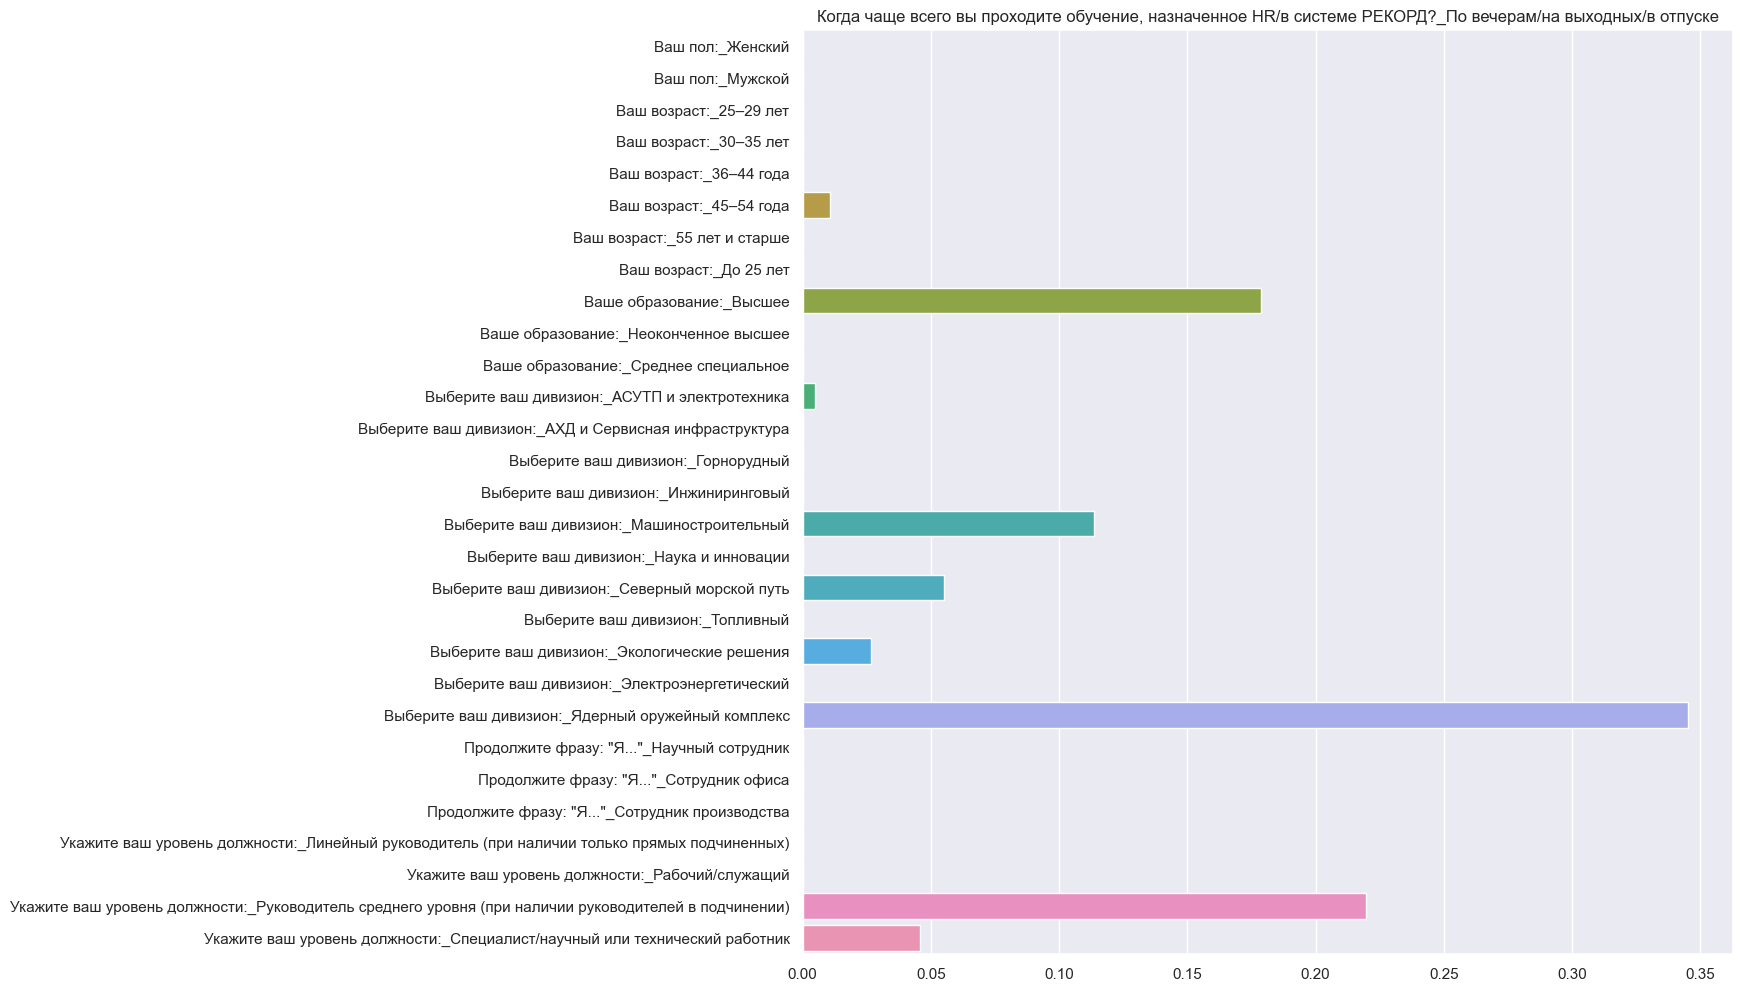

Question: Когда чаще всего вы проходите обучение, назначенное HR/в системе РЕКОРД?_По вечерам/на выходных/в отпуске
Model R^2 score: 0.05


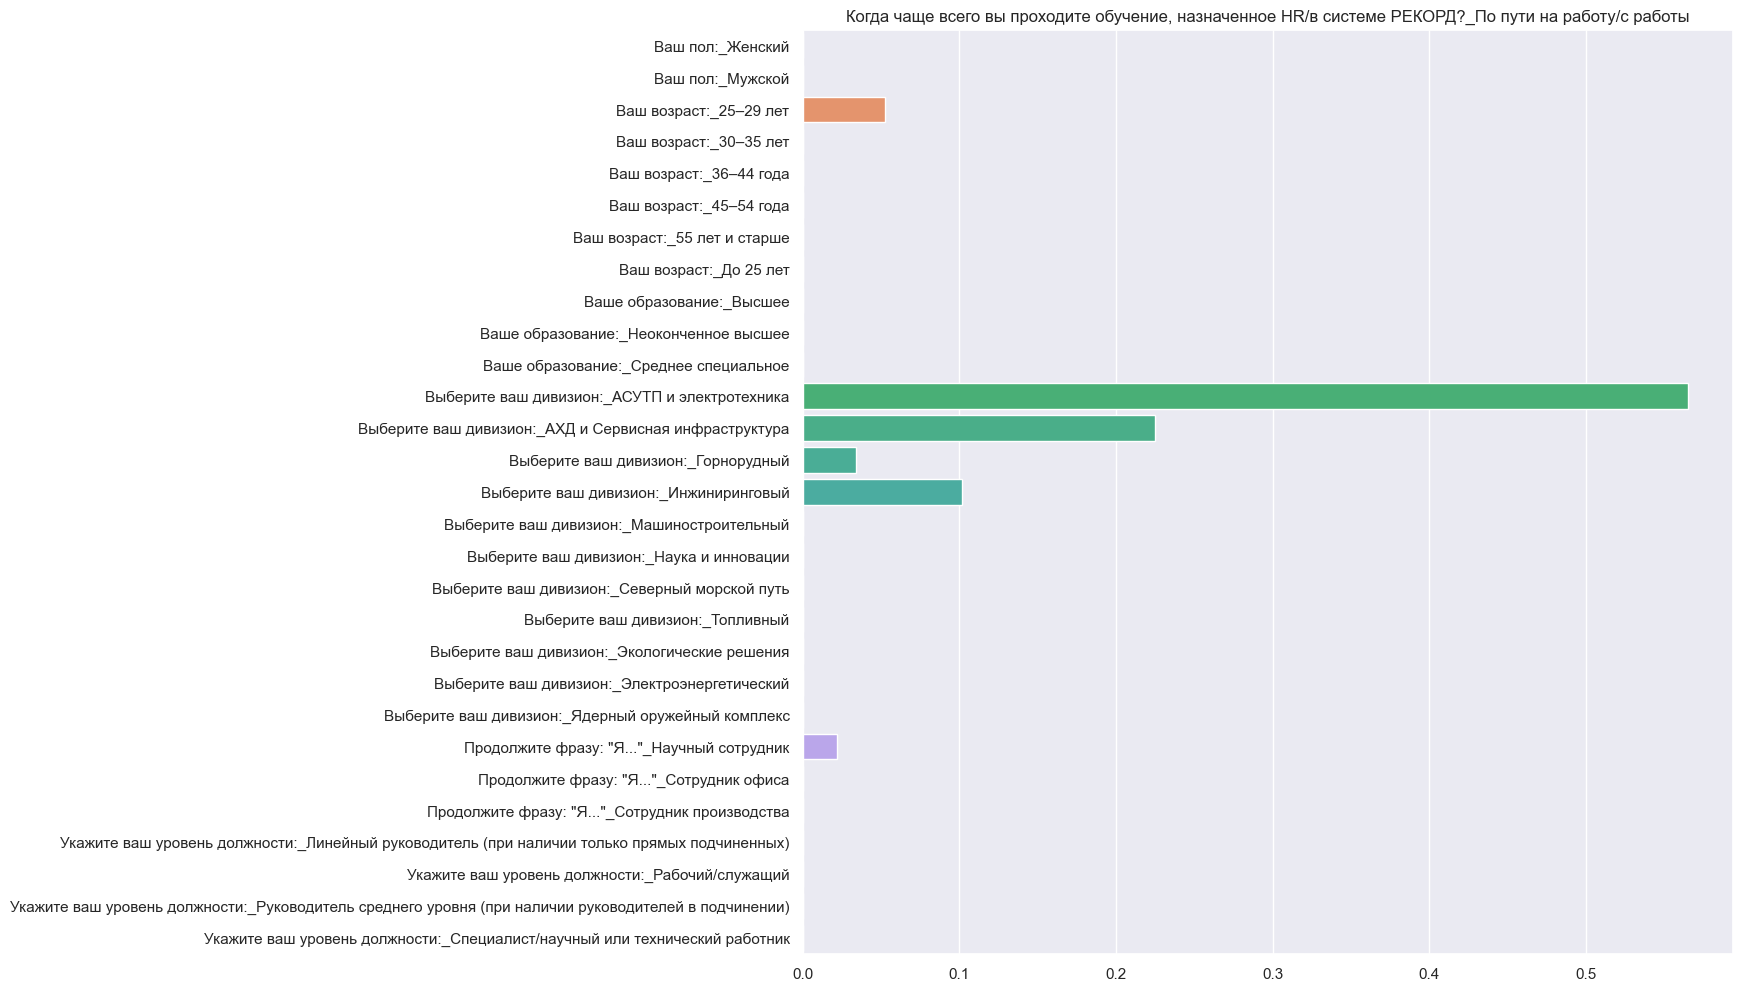

Question: Когда чаще всего вы проходите обучение, назначенное HR/в системе РЕКОРД?_По пути на работу/с работы
Model R^2 score: 0.03


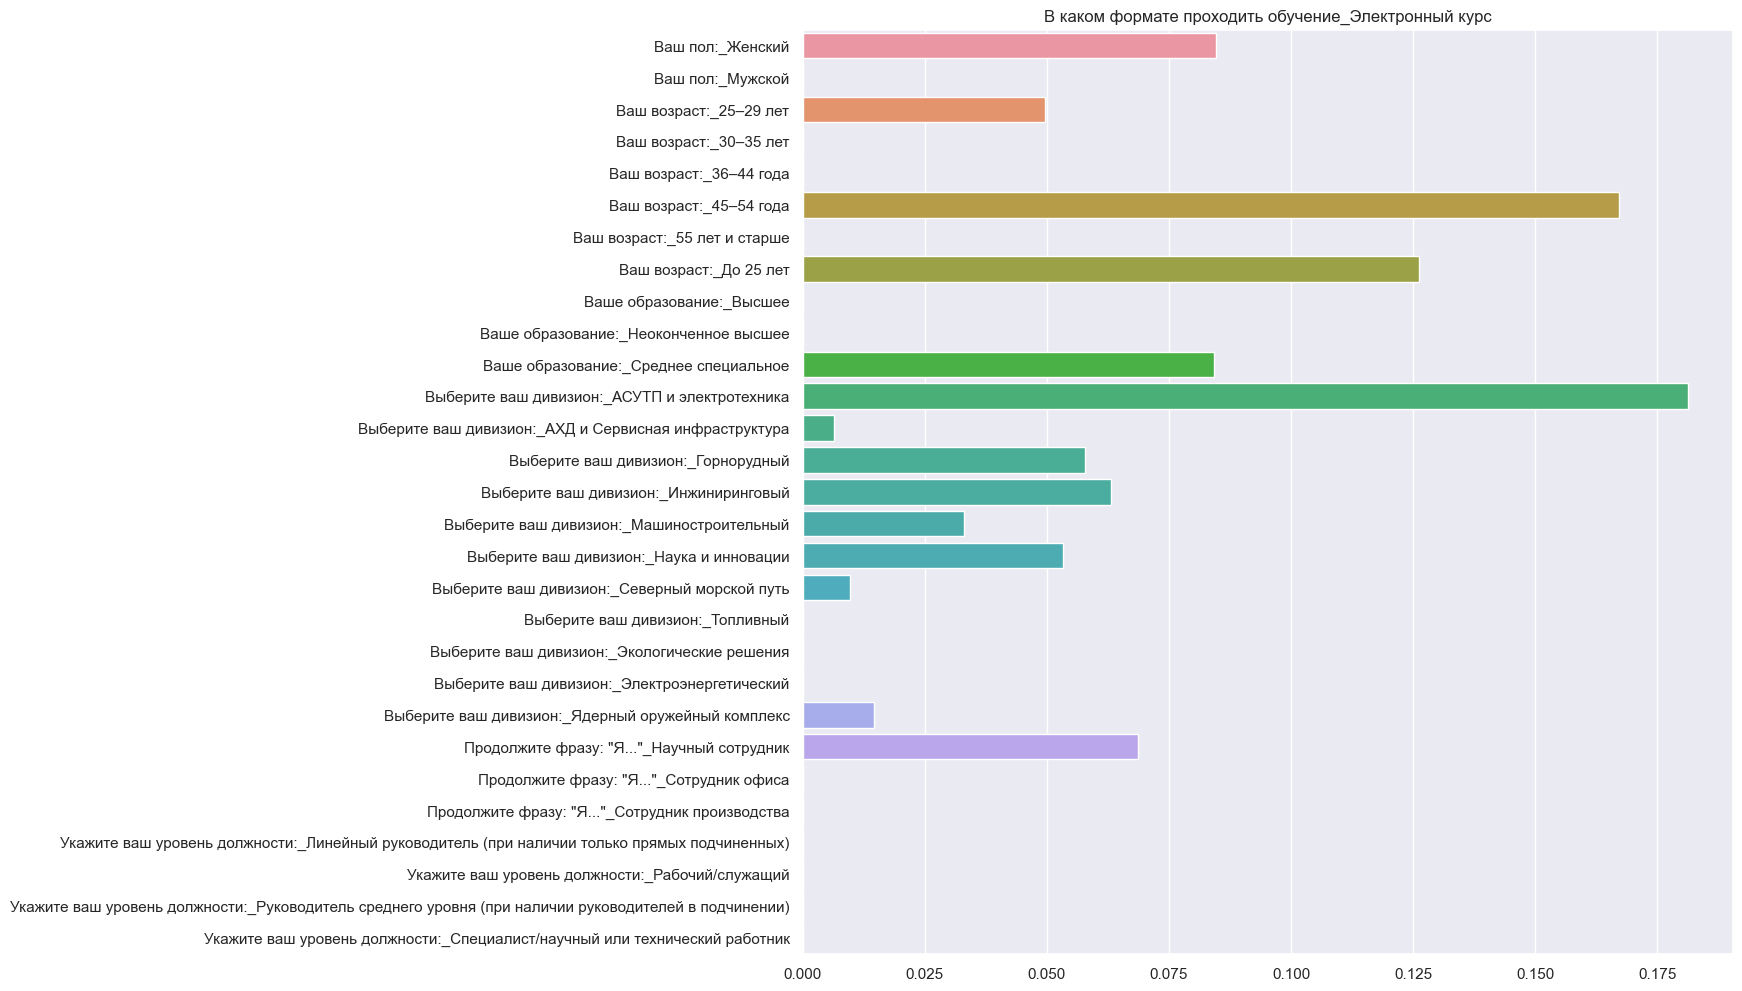

Question: В каком формате проходить обучение_Электронный курс
Model R^2 score: -0.01


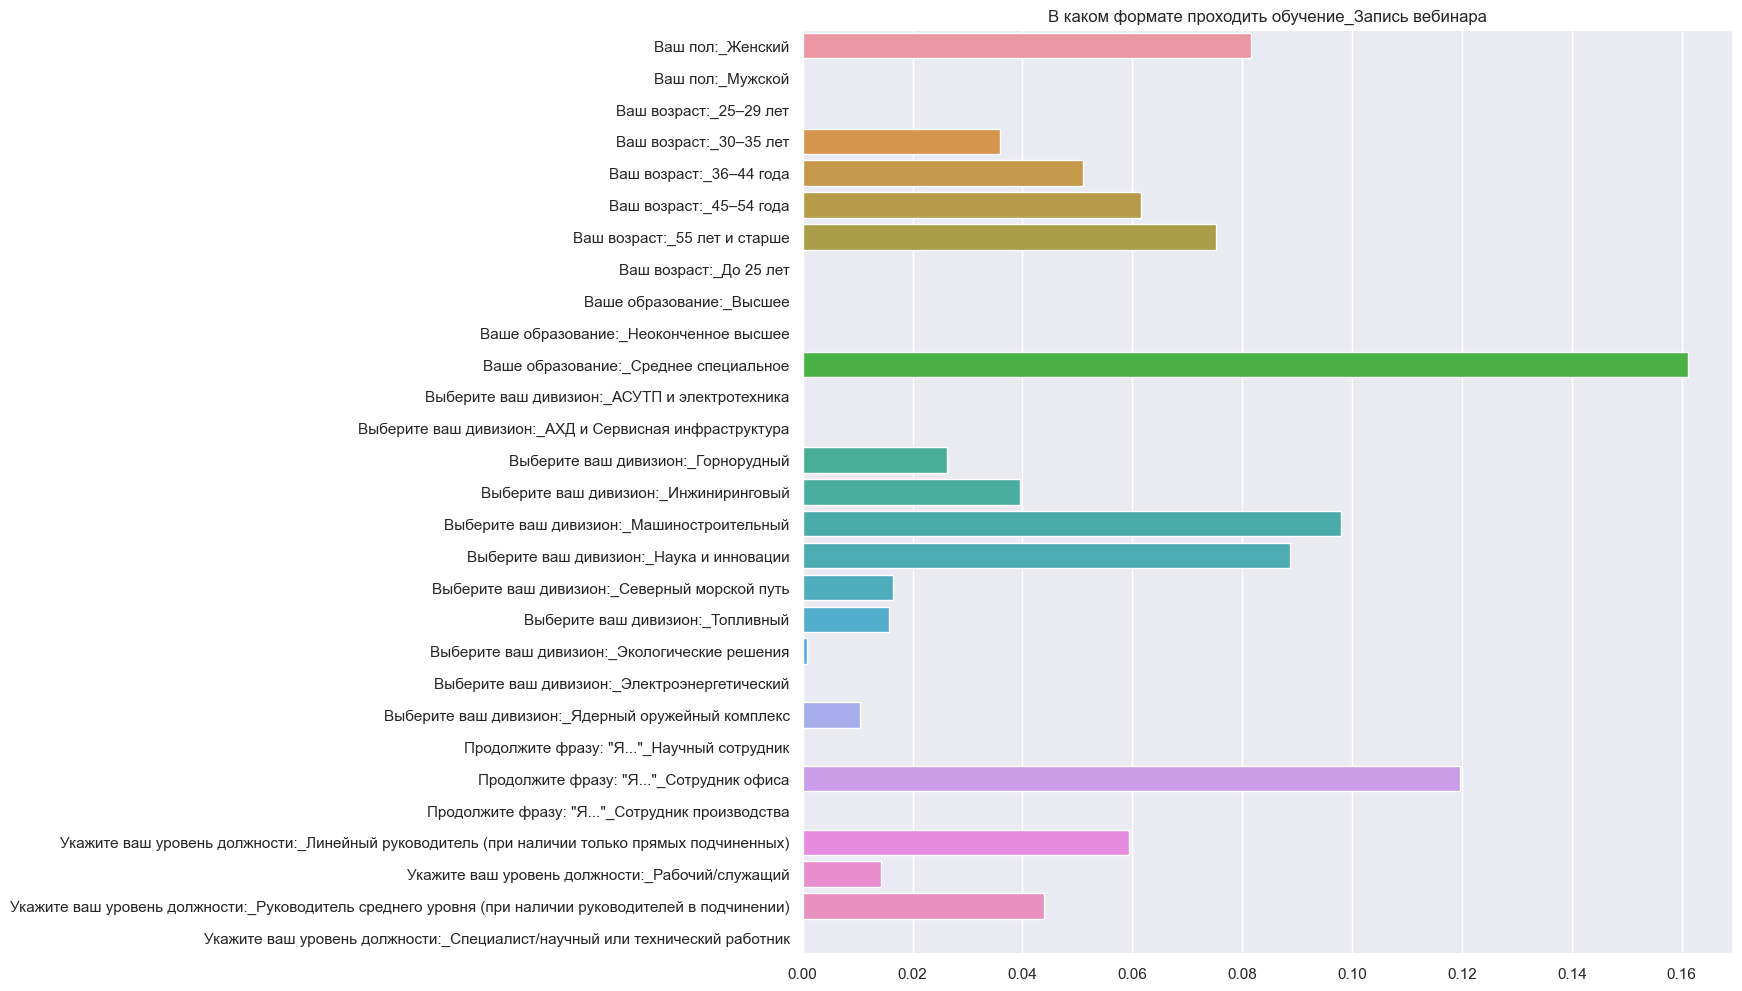

Question: В каком формате проходить обучение_Запись вебинара
Model R^2 score: -0.01


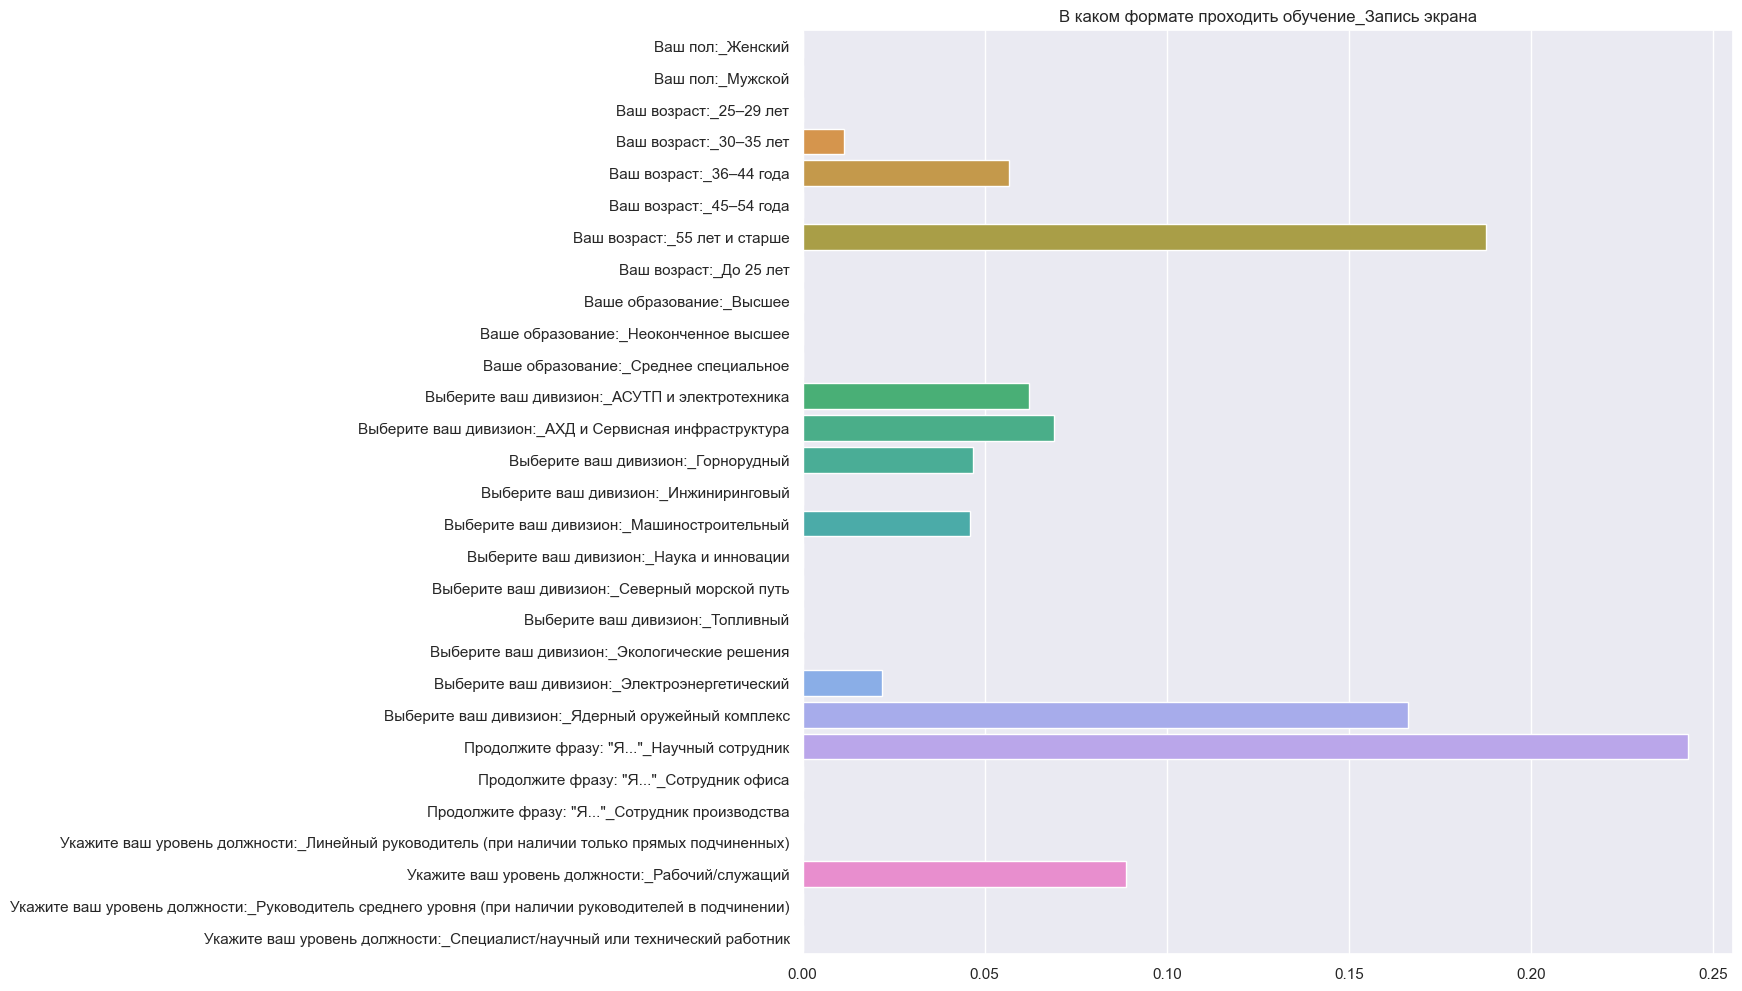

Question: В каком формате проходить обучение_Запись экрана
Model R^2 score: -0.00


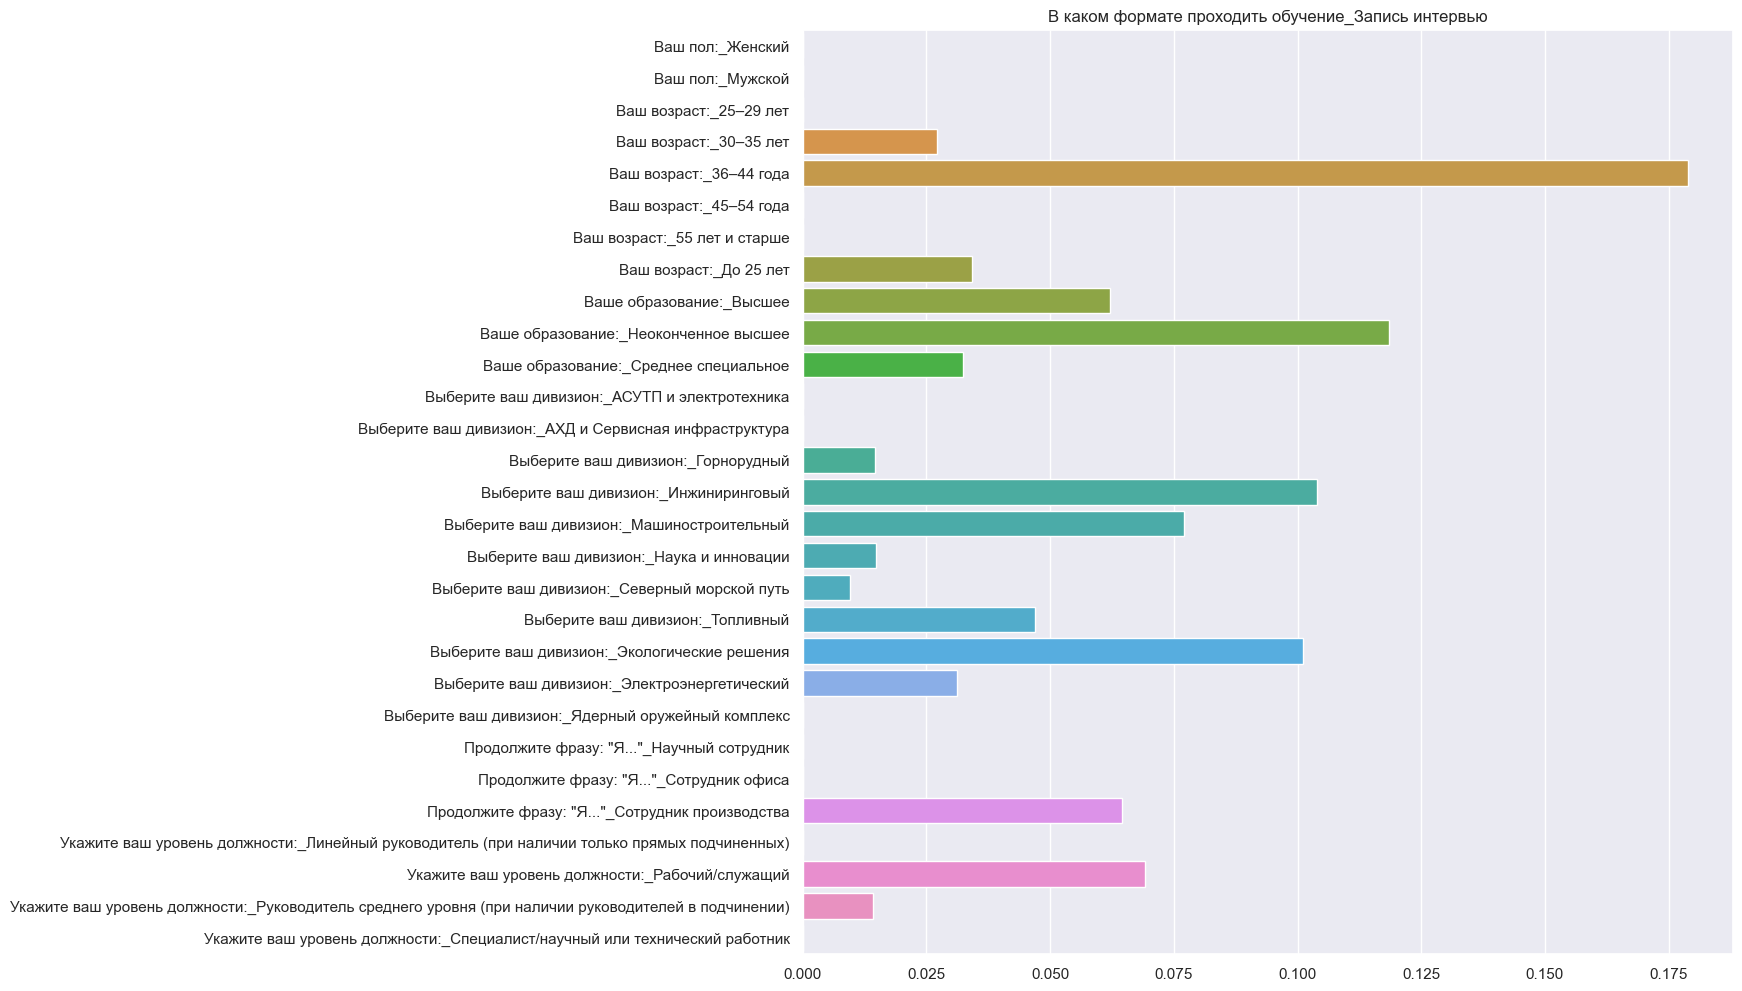

Question: В каком формате проходить обучение_Запись интервью
Model R^2 score: -0.00


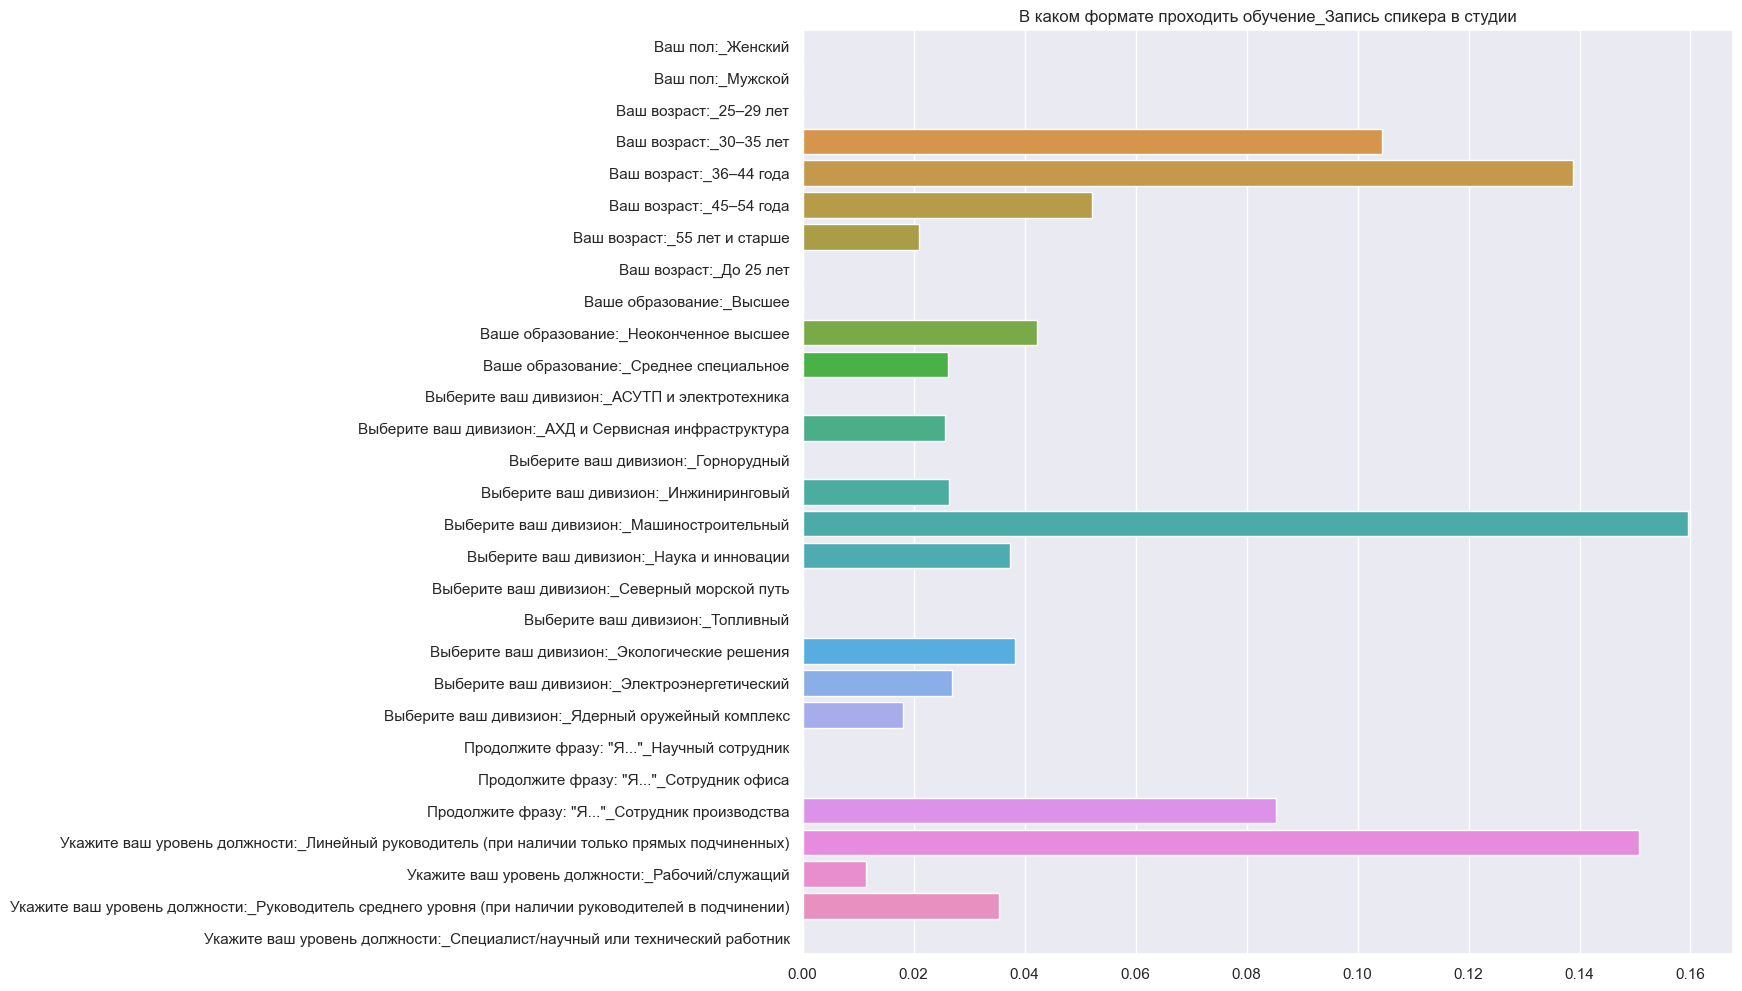

Question: В каком формате проходить обучение_Запись спикера в студии
Model R^2 score: -0.02


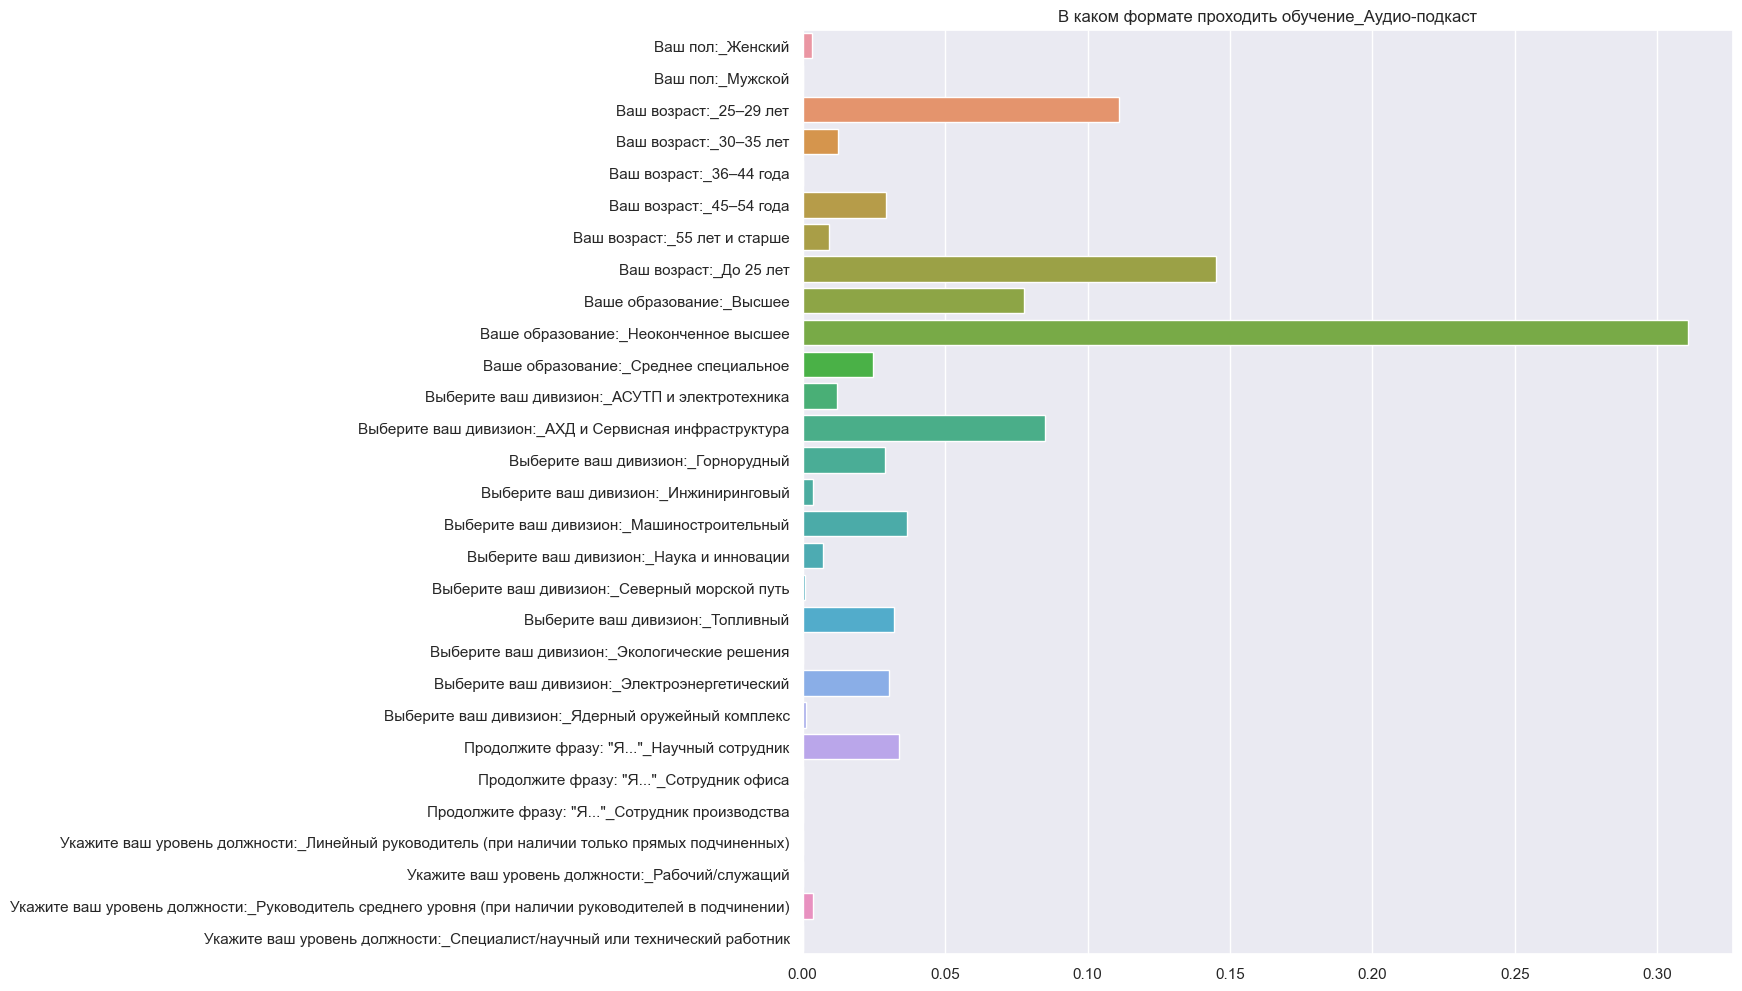

Question: В каком формате проходить обучение_Аудио-подкаст
Model R^2 score: -0.01


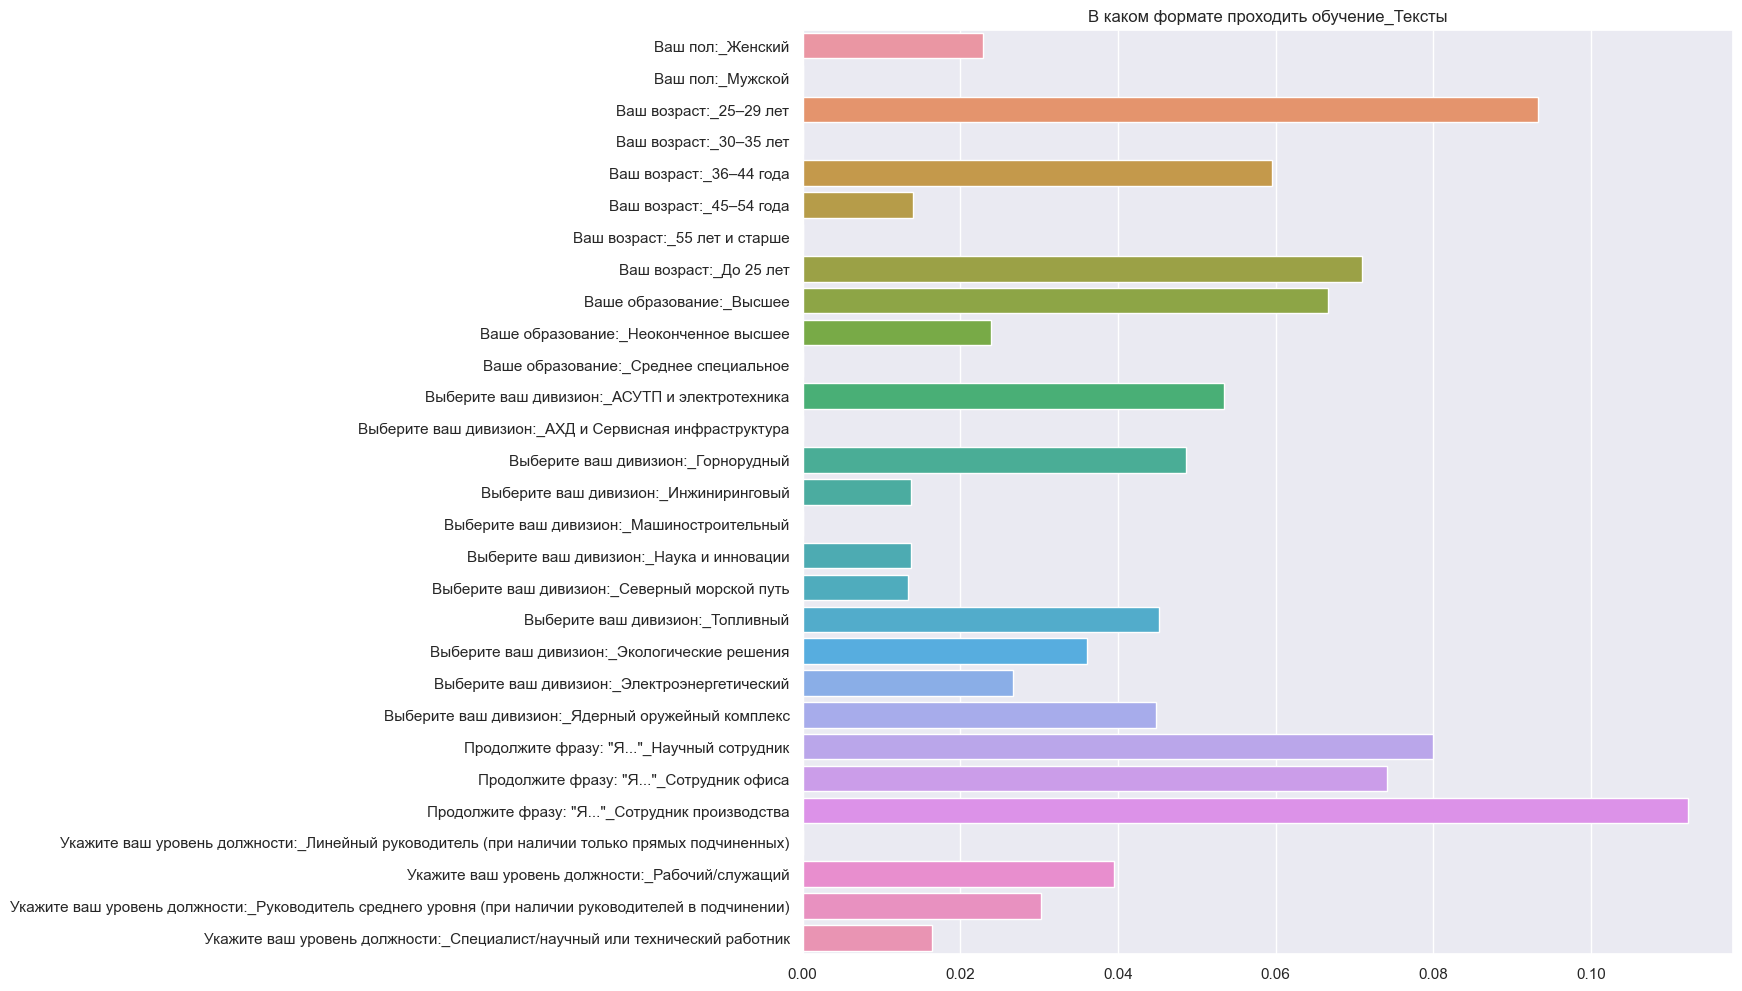

Question: В каком формате проходить обучение_Тексты
Model R^2 score: -0.01


In [246]:
for i in range(len(Y.columns)):
    feature_importances, score = get_feature_importances_from_column(X, Y, i, plot_shap=False)
    print('Question: %s'%Y.columns[i])
    print('Model R^2 score: %0.2f'%score)



# Testing

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

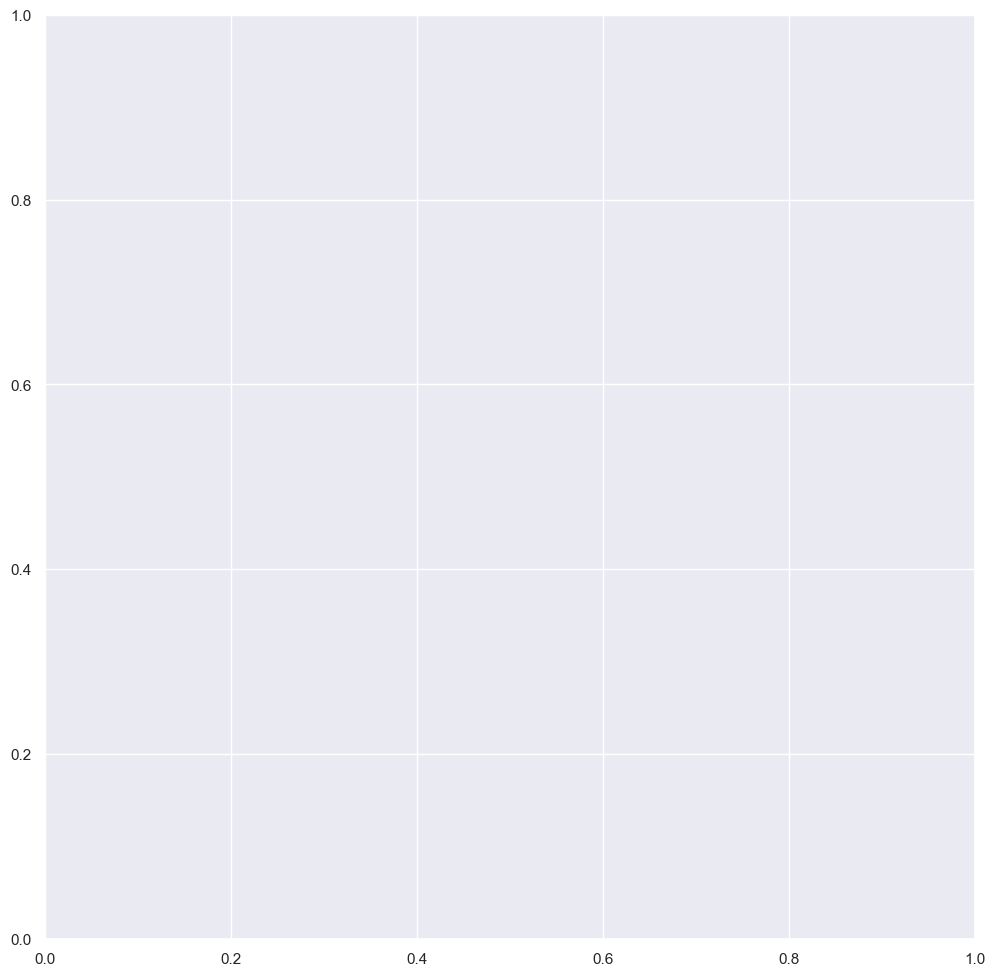

In [253]:
from xgboost import plot_tree

plot_tree(model)
plt.show()